# Exploratory / Statistical Data Analysis

In this notebook, we will explore relationships between several NFL passing statistics and QB win percentage and the several College Passing Statistics and the NFL passing statistics that are deemed significant.

# Loading Modules

In [1]:
import pandas as pd
import numpy as np
import re
import statistics
import seaborn as sns
import math
from scipy import stats
import glob
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
#Define necessary paths
path = '../../capstone_project_1/data/'

In [3]:
#load data into DataFrames
nfl_season = pd.read_csv(path + 'nfl.csv')
nfl_avg = pd.read_csv(path + 'nfl-passing.csv')
college = pd.read_csv(path + 'college-passing.csv')
qbs = pd.read_csv(path + 'qbs-09-19.csv')

In [4]:
nfl_season = nfl_season.set_index('Player')

In [5]:
nfl_avg = nfl_avg.rename(columns={'Unnamed: 0': 'Player'})
nfl_avg = nfl_avg.set_index('Player')

In [6]:
college = college.set_index('Player')

In [7]:
qbs = qbs.set_index('Player')
qbs = qbs.drop(['Unnamed: 0'], axis = 1)

In [8]:
qbs['Y/G_College'] = qbs['Yds_College'] / qbs['G_College']
qbs

,ANY/A,AY/A_NFL,Att_NFL,Cmp_NFL,Cmp%,G_NFL,Int_NFL,Int%,NY/A,QBR,...,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College
Player,,,,,,,,,,,,,,,,,,,,,
A.J. McCarron,6.3,7.4,119.0,79.0,66.4,7,2,1.7,6.0,46.534351,...,67.1,163.3,74,8.8,-0.4,8630,113,3,-40,215.750000
Andrew Luck,6.3,7.0,548.3,333.3,60.4,86,83,2.6,6.4,63.100000,...,66.1,161.1,82,8.9,5.7,9430,163,7,957,248.157895
Andy Dalton,6.1,6.9,510.5,316.4,62.1,122,107,2.6,6.4,50.200000,...,63.8,159.2,50,8.8,4.8,5613,202,9,947,215.884615
Austin Davis,5.3,6.5,284.0,180.0,63.4,10,9,3.2,5.8,44.200000,...,61.6,136.1,50,7.2,3.2,6599,255,14,804,244.407407
Baker Mayfield,6.0,6.8,510.0,313.5,61.6,30,35,3.4,6.6,52.400000,...,69.8,189.5,119,10.7,2.8,12292,316,18,893,307.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tim Tebow,4.8,6.3,271.0,126.0,46.5,14,6,2.2,5.0,39.600000,...,67.8,164.2,21,9.2,4.2,2895,217,14,910,206.785714
Tom Savage,4.4,5.6,223.0,125.0,56.1,8,6,2.7,5.1,37.200000,...,56.8,133.4,35,7.7,-2.2,5169,135,4,-313,206.760000
Trevor Siemian,5.2,6.1,417.5,247.5,59.2,25,24,3.0,5.8,40.800000,...,58.9,116.0,24,6.3,0.4,5675,137,6,-42,157.638889


# Bivariate Analysis NFL Data, Select Target Based on Correlation to Win Pct and College Data.

In [9]:
#Correlation Matrix of 10 year NFL averages with Win Pct
nfl_avg_corr = nfl_avg.corr()
nfl_avg_corr = nfl_avg_corr[['win_pct','ANY/A', 'AY/A', 'Att', 'Cmp', 'Cmp%', 'G', 'Int', 'Int%', 'NY/A',
       'QBR', 'Rate', 'Sk', 'Sk%', 'TD', 'TD%', 'Y/A', 'Y/C', 'Y/G', 'Yds']]
nfl_avg_corr = nfl_avg_corr.sort_values(by=['win_pct'], ascending = False)
nfl_corr_styler = nfl_avg_corr.style.set_properties(**{'background-color': 'lawngreen',
                           'color': 'black',
                           'border-color': 'white'}, subset=['win_pct'])

In [10]:
nfl_corr_styler

,win_pct,ANY/A,AY/A,Att,Cmp,Cmp%,G,Int,Int%,NY/A,QBR,Rate,Sk,Sk%,TD,TD%,Y/A,Y/C,Y/G,Yds
win_pct,1,0.717887,0.721975,0.558721,0.591516,0.553458,0.475152,0.393053,-0.498858,0.641939,0.668838,0.72948,0.449958,-0.299554,0.486661,0.685187,0.635708,0.352533,0.49731,0.473782
Rate,0.72948,0.957923,0.966424,0.611327,0.674949,0.824149,0.537143,0.424973,-0.737903,0.832198,0.859048,1,0.525867,-0.359911,0.573657,0.845472,0.836955,0.36593,0.711027,0.553345
AY/A,0.721975,0.979146,1,0.582016,0.631123,0.68964,0.511756,0.408452,-0.727914,0.878157,0.837209,0.966424,0.504164,-0.327902,0.542727,0.819932,0.906437,0.575722,0.708356,0.526276
ANY/A,0.717887,1,0.979146,0.60082,0.651128,0.697266,0.534692,0.444285,-0.701942,0.9244,0.866928,0.957923,0.50131,-0.504452,0.570191,0.834983,0.886308,0.536158,0.753441,0.55385
TD%,0.685187,0.834983,0.819932,0.585199,0.634486,0.641569,0.526696,0.460401,-0.382411,0.813483,0.815476,0.845472,0.504235,-0.408026,0.586511,1,0.795863,0.473431,0.686664,0.545564
QBR,0.668838,0.866928,0.837209,0.628228,0.678546,0.683582,0.553965,0.472502,-0.554861,0.810396,1,0.859048,0.518276,-0.482385,0.590812,0.815476,0.758029,0.385016,0.672483,0.571045
NY/A,0.641939,0.9244,0.878157,0.557185,0.607634,0.654821,0.50437,0.470552,-0.396281,1,0.810396,0.832198,0.453293,-0.587499,0.54739,0.813483,0.940923,0.639489,0.796111,0.53335
Y/A,0.635708,0.886308,0.906437,0.516123,0.566911,0.646274,0.458666,0.410886,-0.391983,0.940923,0.758029,0.836955,0.448952,-0.291257,0.497977,0.795863,1,0.730198,0.738704,0.483438
Cmp,0.591516,0.651128,0.631123,0.99201,1,0.605277,0.718379,0.69023,-0.412247,0.607634,0.678546,0.674949,0.701317,-0.383607,0.732629,0.634486,0.566911,0.193425,0.80349,0.739062
Att,0.558721,0.60082,0.582016,1,0.99201,0.514529,0.70144,0.685365,-0.388338,0.557185,0.628228,0.611327,0.689792,-0.364238,0.70479,0.585199,0.516123,0.207031,0.774022,0.71637


## Define new DataFrame to include rate-based metrics that have moderate or strong correlation to NFL Win Pct ( >= 0.5 ).

In [11]:
#list comprehension to obtain significant metrics
columns = [row for row in nfl_avg_corr.index if (nfl_avg_corr[row]['win_pct'] >= 0.5)]

#define new dataframe 
nfl_avg = nfl_avg[columns]

#get rid of raw metrics that had moderate correlation -- Cmp & Att
nfl_avg = nfl_avg.drop(['Cmp','Att'], axis=1)

In [12]:
#Resulting DataFrame with significant Metrics
nfl_avg

,win_pct,Rate,AY/A,ANY/A,TD%,QBR,NY/A,Y/A,Cmp%
Player,,,,,,,,,
A.J. McCarron,0.666667,97.1,7.4,6.3,5.0,NaN,6.0,7.2,66.4
Aaron Rodgers,0.681529,103.6,8.4,7.4,6.2,67.6,6.8,7.8,64.9
Alex Smith,0.638462,91.8,7.1,6.2,4.3,54.3,6.2,7.1,64.0
Andrew Luck,0.616279,88.3,7.0,6.3,5.2,63.1,6.4,7.1,60.4
Andy Dalton,0.541667,87.9,6.9,6.1,4.5,50.2,6.4,7.1,62.1
...,...,...,...,...,...,...,...,...,...
Troy Smith,0.500000,77.8,7.6,6.0,3.4,38.5,6.5,8.1,50.3
Tyler Palko,0.250000,59.8,3.9,3.0,1.5,29.6,4.9,5.9,59.7
Tyrod Taylor,0.517241,89.4,7.0,5.9,3.6,60.7,5.7,6.8,62.2


In [13]:
nfl_avg.loc['Sam Darnold']['win_pct']

0.4230769230769231

In [14]:
win_pct = nfl_avg['win_pct']

qbs['win_pct'] = win_pct

qbs.loc['Sam Darnold']['win_pct']

0.4230769230769231

In [15]:
qbs_winpct = qbs[['win_pct', 'AY/A_College',
       'Att_College', 'Cmp_College', 'G_College', 'Int_College', 'Pct',
       'Rate_College', 'TD_College', 'Y/A_College', 'Yds_College', 'Y/G_College']]

In [16]:
qbs_winpct.head()
qbs_winpct.to_csv('qb-winpct.csv')

## Heatmap Correlation Matrix of Significant Metrics

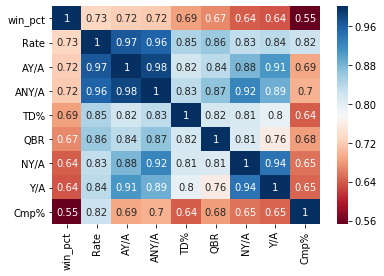

In [17]:
nfl_corr_new = nfl_avg.corr()
sns.heatmap(nfl_corr_new, xticklabels=nfl_corr_new.columns, yticklabels=nfl_corr_new.columns,cmap='RdBu', annot=True)

As seen from the correlation matrix above and and in the heatmap, there are 9 metrics that have a moderate to strong correlation with NFL Win Percentage. The target will be chosen from Passer rating, AY/A, ANY/A, TD%, QBR, NY/A, Y/A, Cmp%.  

# Scatter plots Win Pct vs NFL Stats, NFL Stats Distribution

Text(0.5, 1.0, 'Win Percentage vs Rate')

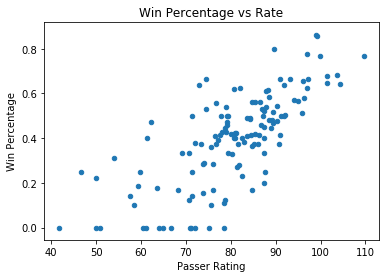

In [19]:
#Win Pct vs Passer Rating, min 100 attempts
rate = nfl_avg[['win_pct','Rate']]
rate.plot(x='Rate', y='win_pct',kind='scatter')
plt.ylabel('Win Percentage')
plt.xlabel('Passer Rating')
plt.title('Win Percentage vs Rate')

Text(0.5, 1.0, 'Win_pct vs AY/A')

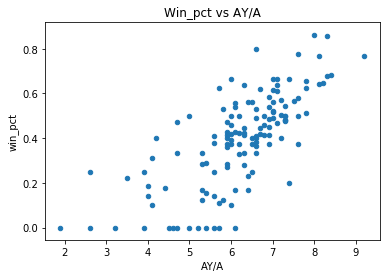

In [15]:
#Win Pct vs AY/A, min 100 attempts
aya = nfl_avg[['win_pct','AY/A']]
aya.plot(x='AY/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs AY/A')

In [16]:
nfl_avg.columns

Index(['win_pct', 'Rate', 'AY/A', 'ANY/A', 'TD%', 'QBR', 'NY/A', 'Y/A',
       'Cmp%'],
      dtype='object')

Text(0.5, 1.0, 'Win_pct vs ANY/A')

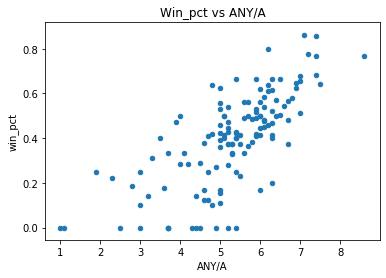

In [17]:
#Win Pct vs ANY/A, min 100 attempts
anya = nfl_avg[['win_pct','ANY/A']]
anya.plot(x='ANY/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs ANY/A')

Text(0.5, 1.0, 'Win_pct vs TD%')

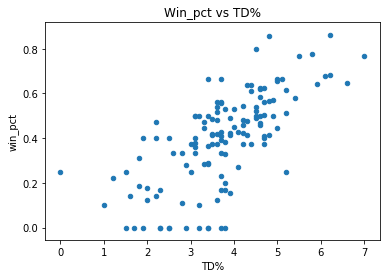

In [18]:
#Win Pct vs TD%, min 100 attempts
td = nfl_avg[['win_pct','TD%']]
td.plot(x='TD%', y='win_pct',kind='scatter')
plt.title('Win_pct vs TD%')

Text(0.5, 1.0, 'Win_pct vs QBR')

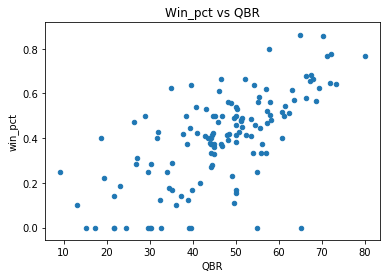

In [19]:
#Win Pct vs QBR, min 100 attempts
qbr = nfl_avg[['win_pct','QBR']]
qbr.plot(x='QBR', y='win_pct',kind='scatter')
plt.title('Win_pct vs QBR')

Text(0.5, 1.0, 'Win_pct vs NY/A')

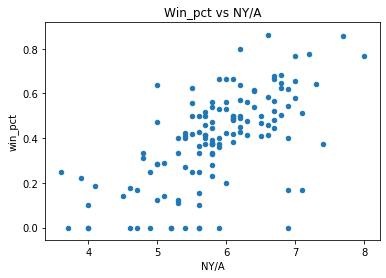

In [20]:
#Win Pct vs NY/A, min 100 attempts
nya = nfl_avg[['win_pct','NY/A']]
nya.plot(x='NY/A', y='win_pct',kind='scatter')
plt.title('Win_pct vs NY/A')

Text(0.5, 1.0, 'Win Percentage vs YPA')

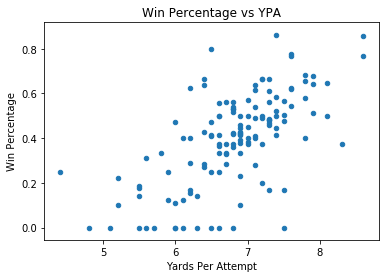

In [21]:
#Win Pct vs Y/A, min 100 attempts
ypa = nfl_avg[['win_pct','Y/A']]
ypa.plot(x='Y/A', y='win_pct',kind='scatter')
plt.ylabel('Win Percentage')
plt.xlabel('Yards Per Attempt')
plt.title('Win Percentage vs YPA')

Text(0.5, 1.0, 'Win_pct vs Cmp%')

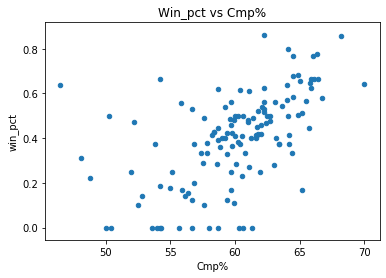

In [22]:
#Win Pct vs Cmp%, min 100 attempts
cmp = nfl_avg[['win_pct','Cmp%']]
cmp.plot(x='Cmp%', y='win_pct',kind='scatter')
plt.title('Win_pct vs Cmp%')

# Correlation Matrices of 8 Targets and College Stats.

Starting with strongest correlation to Win Pct, Passer Rating.

Text(0.5, 1, 'Correlation Matrix of Passer Rating w/ College Stats')

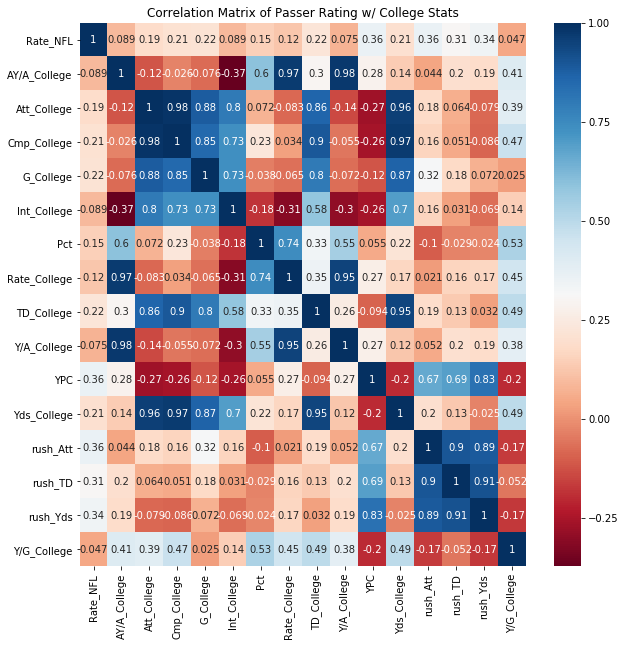

In [23]:
#Passer Rating
rate_w_college = qbs[['Rate_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
rate_w_college_corr = rate_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(rate_w_college_corr, xticklabels=rate_w_college_corr.columns, yticklabels=rate_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Passer Rating w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of AY/A w/ College Stats')

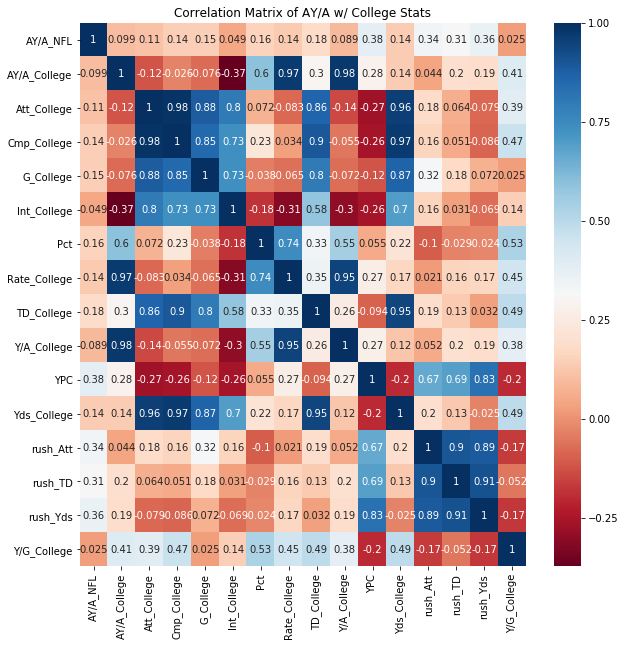

In [24]:
#Passer Rating
aya_w_college = qbs[['AY/A_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
aya_w_college_corr = aya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(aya_w_college_corr, xticklabels=aya_w_college_corr.columns, yticklabels=aya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of AY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of AY/A w/ College Stats')

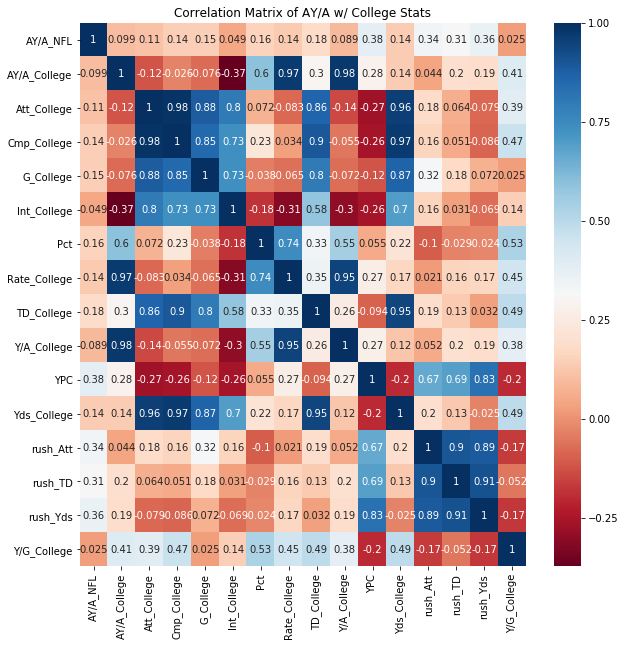

In [25]:
#AY/A
aya_w_college = qbs[['AY/A_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
aya_w_college_corr = aya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(aya_w_college_corr, xticklabels=aya_w_college_corr.columns, yticklabels=aya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of AY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of ANY/A w/ College Stats')

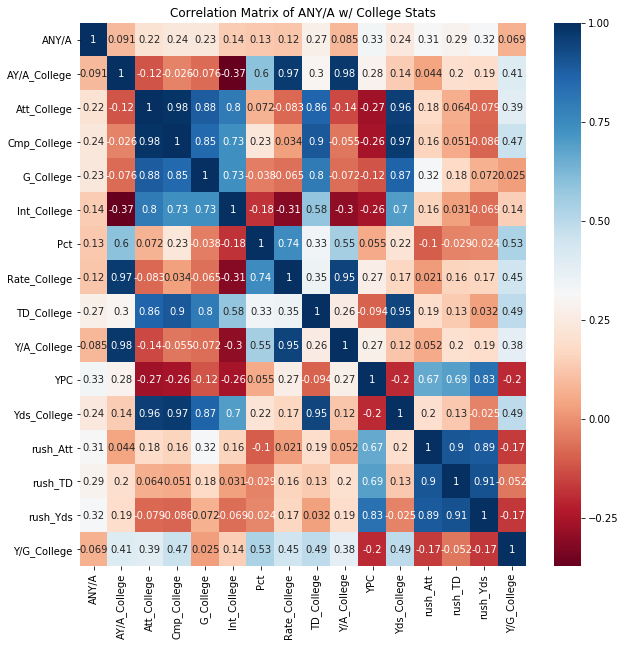

In [26]:
#ANY/A
anya_w_college = qbs[['ANY/A','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
anya_w_college_corr = anya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(anya_w_college_corr, xticklabels=anya_w_college_corr.columns, yticklabels=anya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of ANY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of TD% w/ College Stats')

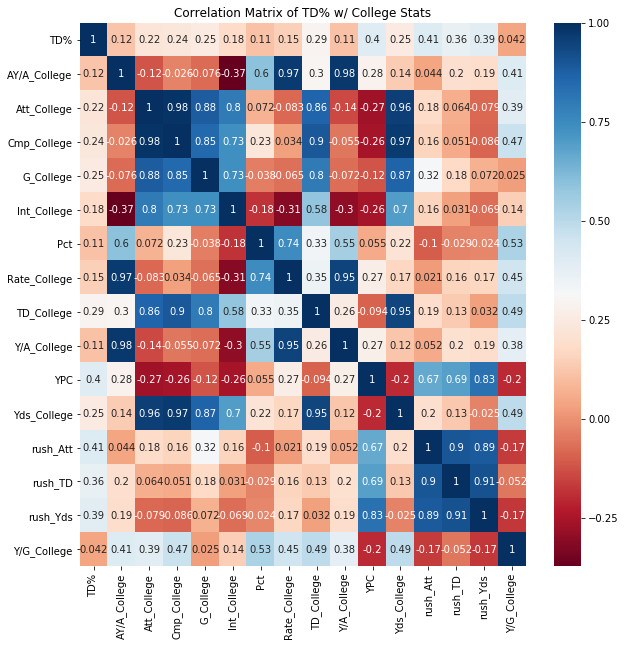

In [27]:
#TD%
td_w_college = qbs[['TD%','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
td_w_college_corr = td_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(td_w_college_corr, xticklabels=td_w_college_corr.columns, yticklabels=td_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of TD% w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of QBR w/ College Stats')

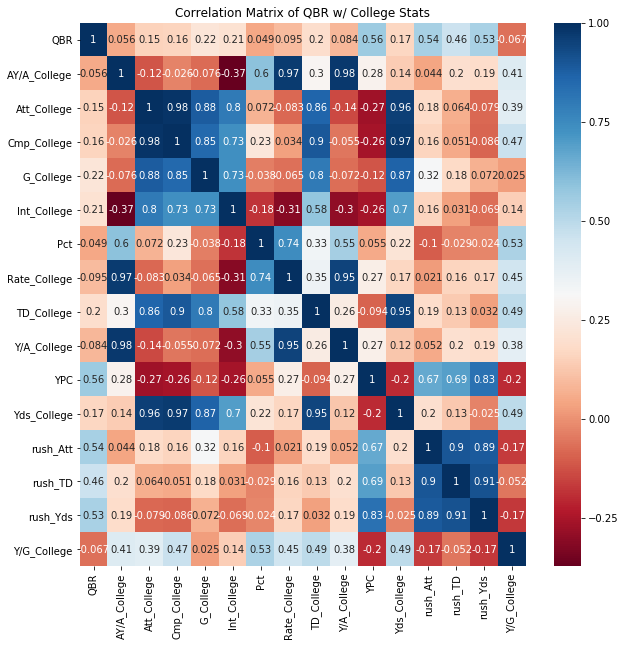

In [28]:
#QBR
qbr_w_college = qbs[['QBR','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
qbr_w_college_corr = qbr_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(qbr_w_college_corr, xticklabels=qbr_w_college_corr.columns, yticklabels=qbr_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of QBR w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of NY/A w/ College Stats')

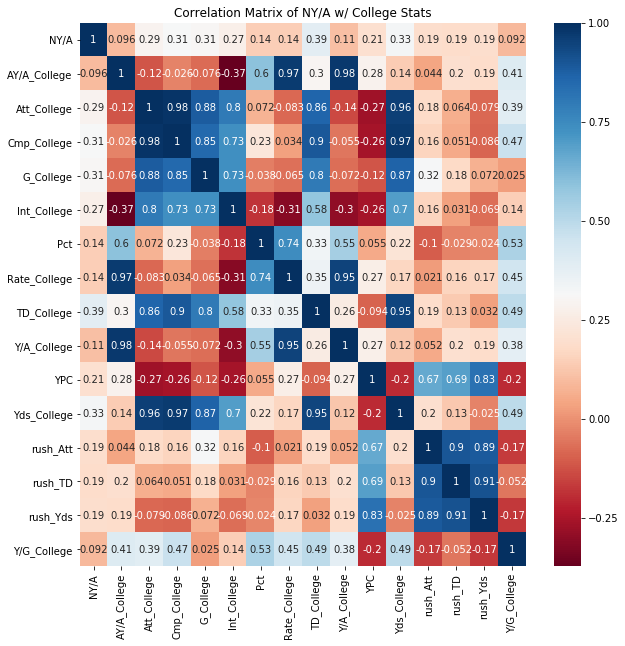

In [29]:
#NY/A
nya_w_college = qbs[['NY/A','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
nya_w_college_corr = nya_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(nya_w_college_corr, xticklabels=nya_w_college_corr.columns, yticklabels=nya_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of NY/A w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of YPA w/ College Stats')

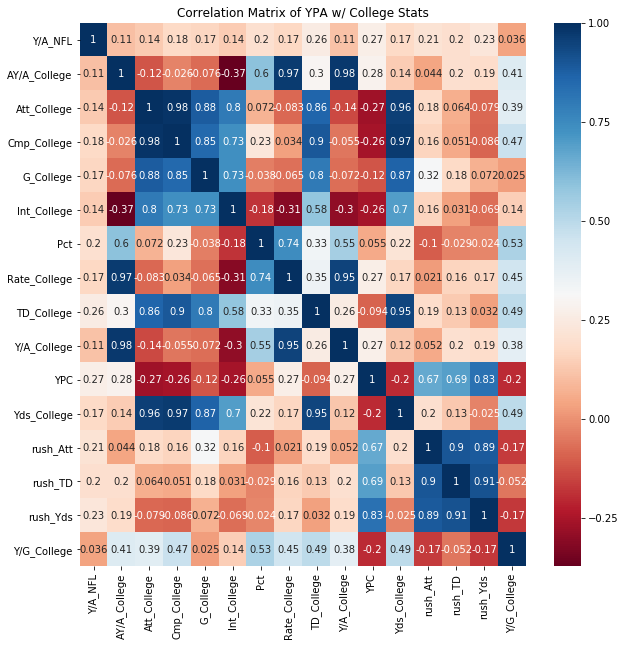

In [30]:
#YPA
ypa_w_college = qbs[['Y/A_NFL','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
ypa_w_college_corr = ypa_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(ypa_w_college_corr, xticklabels=ypa_w_college_corr.columns, yticklabels=ypa_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of YPA w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of Cmp% w/ College Stats')

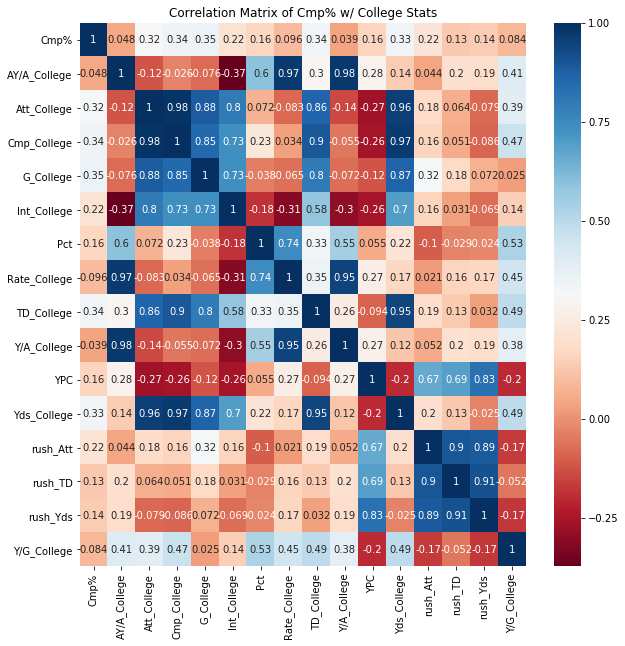

In [31]:
#Cmp%
cmp_w_college = qbs[['Cmp%','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
cmp_w_college_corr = cmp_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cmp_w_college_corr, xticklabels=cmp_w_college_corr.columns, yticklabels=cmp_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Cmp% w/ College Stats')

Text(0.5, 1, 'Correlation Matrix of Win Pct w/ College Stats')

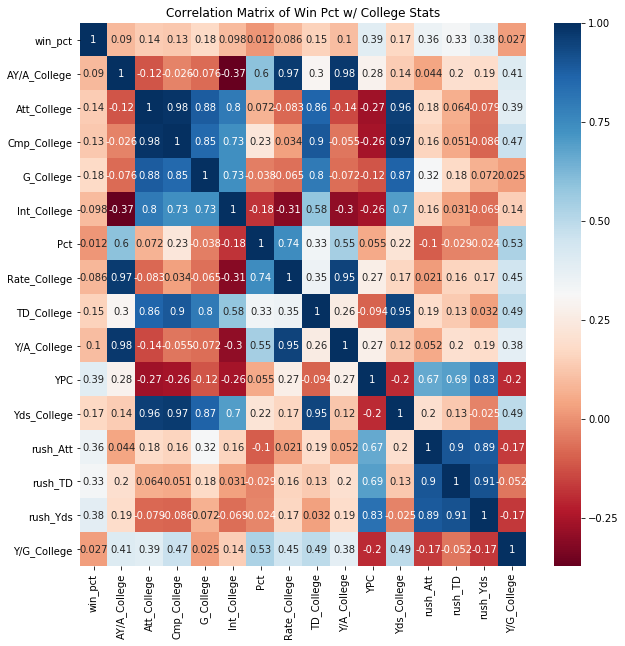

In [32]:
#Win Pct
win_w_college = qbs[['win_pct','AY/A_College','Att_College','Cmp_College','G_College','Int_College','Pct','Rate_College','TD_College','Y/A_College','YPC','Yds_College','rush_Att','rush_TD','rush_Yds','Y/G_College']]
win_w_college_corr = win_w_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(win_w_college_corr, xticklabels=win_w_college_corr.columns, yticklabels=win_w_college_corr.columns, annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Win Pct w/ College Stats')

### Observations
The heatmaps above provide some interesting insights into how the college data relates to our suspected targets.

Oddly, many of the pure passing statistics in the NFL have the strongest associations with college rushing statistics. This is expected for QBR, however, because QBR is calculated using rushing. This would be a QB with strong college rushing stats would get a QBR boost in the NFL if they continued to run at the pro level.

Another interesting takeaway is that the strongest associations seem to come from raw statistics vs the percentage and rate based metrics such as Pct, Rate_College, and Y/A_College.

However, the most consistency across all features occurred when related to YPA. We will use this as our target metric to build our model. To do this, the NFL average will be calculated then a categorical column will be made in our QB DataFrame that consists of QBs drafted between 2009-2019 that will denote whether or not that QB has an avg YPA above the NFL year average. 

# Calculate NFL Average YPA

In [33]:
#nfl qb statistics per season from 2009 to 2019, min 100 attempts
nfl_season.head()

,ANY/A,AY/A,Att,Cmp,Cmp%,Int,Int%,NY/A,QBR,Rate,...,TD%,Tm,Y/A,Y/G,Yds,G,Year,win_pct,cpoe,aDOT
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,7.47,8.7,541,350,64.7,7,1.3,6.98,70.7,103.2,...,5.5,GNB,8.2,277.1,4434,16,2009,0.687500,4.0,9.2
Marc Bulger,4.65,5.3,247,140,56.7,6,2.4,5.30,32.3,70.7,...,2.0,STL,5.9,163.2,1469,9,2009,0.125000,-4.7,7.7
Tom Brady,7.38,7.7,565,371,65.7,13,2.3,7.42,73.2,96.2,...,5.0,NWE,7.8,274.9,4398,16,2009,0.625000,3.5,8.3
Joe Flacco,6.12,7.0,499,315,63.1,12,2.4,6.35,59.8,88.9,...,4.2,BAL,7.2,225.8,3613,16,2009,0.562500,3.2,8.7
Drew Brees,8.31,8.9,514,363,70.6,11,2.1,7.96,83.4,109.6,...,6.6,NOR,8.5,292.5,4388,15,2009,0.866667,8.9,8.2


In [34]:
ypa_avg = round(nfl_season['Y/A'].mean(), 1)
print('The Average NFL YPA is ' + str(ypa_avg))

The Average NFL YPA is 7.1


In [35]:
ypa_w_college.columns

Index(['Y/A_NFL', 'AY/A_College', 'Att_College', 'Cmp_College', 'G_College',
       'Int_College', 'Pct', 'Rate_College', 'TD_College', 'Y/A_College',
       'YPC', 'Yds_College', 'rush_Att', 'rush_TD', 'rush_Yds', 'Y/G_College'],
      dtype='object')

Therefore, the goal of this project will now be to predict if a Quarterback's YPA in the NFL will be greater or less than the NFL Average YPA of 7.1 by initially using the following features:
1. AY/A_College (Adjusted Yards Per Attempt)
2. Att_College  (Total Attempts)
3. Cmp_College  (Total Completions)
4. G_College    (Total Games)
5. Int_College  (Total Int)
6. Pct          (Completion Percentage)
7. Rate_College (Passer Rating)
8. TD_College   (Total Passing Touchdowns)
9. Y/A_College  (Yards Per Attempt)
10. YPC         (Yards Per Carry)
11. Yds_College (Total Passing Yards)
12. rush_Att    (Total Rush Attempts)
13. rush_TD     (Total Rush Touchdowns)
14. rush_Yds    (Total Rush Yards)
15. Y/G_College (Passing Yards Per Game)

# Sort Data, Add Categorical Column

In [46]:
qbs_ypa = qbs[['Y/A_NFL', 'AY/A_College', 'Att_College', 'Cmp_College', 'G_College',
       'Int_College', 'Pct', 'Rate_College', 'TD_College', 'Y/A_College',
       'YPC', 'Yds_College', 'rush_Att', 'rush_TD', 'rush_Yds','Y/G_College']].sort_values(by='Y/A_NFL', ascending=False)
qbs_ypa.to_csv('qbs-ypa-cont.csv')

In [47]:
above_nfl_ypa = [1 if ypa >=ypa_avg else 0 for ypa in qbs['Y/A_NFL']]

qbs_ypa['above_nfl_ypa'] = above_nfl_ypa

qbs_ypa.to_csv('qbs-ypa-cat.csv')

# QBR w/ college data. See if model works better.

In [52]:
qbs_rating = qbs[['Rate_NFL','AY/A_College', 'Att_College', 'Cmp_College', 'G_College',
       'Int_College', 'Pct', 'Rate_College', 'TD_College', 'Y/A_College', 'Yds_College','Y/G_College']].sort_values(by='Rate_NFL', ascending=False)

In [53]:
#nfl average QBR
rate_avg = round(nfl_season['Rate'].mean(), 1)
print(rate_avg)

85.8


In [54]:
above_nfl_rate = [1 if rate >= rate_avg else 0 for rate in qbs_rating['Rate_NFL']]

qbs_rating['above_nfl_rate'] = above_nfl_rate

In [56]:
qbs_rating.to_csv('qbs_rate.csv')

### Observations
There were 63 NLF QBs between 2009-2019 that had more than 100 passing attempts in College between that same time frame.\
Many Recognizable Names are have higher NFL YPAs which is a good indicator that YPA makes sense as our target. \

# Univariate Analysis of Features

In [39]:
#Summary Statistics
qbs.describe()

,Y/A_NFL,AY/A_College,Att_College,Cmp_College,G_College,Int_College,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College,above_nfl_ypa
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,6.831746,8.390476,927.746032,590.206349,29.158730,20.492063,63.338095,148.201587,59.444444,8.107937,1.731746,7497.555556,197.730159,10.904762,565.809524,256.703572,0.365079
std,0.717483,1.401924,357.029906,234.085741,9.733889,9.542558,4.232571,16.443231,26.909513,1.028199,2.869181,2943.152944,119.099742,10.051022,845.562856,52.766689,0.485320
min,4.400000,5.700000,280.000000,160.000000,10.000000,4.000000,55.100000,116.000000,17.000000,6.300000,-5.000000,2044.000000,34.000000,0.000000,-425.000000,157.638889,0.000000
25%,6.500000,7.400000,655.500000,397.000000,25.000000,14.000000,60.400000,134.800000,39.000000,7.400000,-0.550000,5069.500000,108.500000,4.000000,-52.500000,214.682692,0.000000
50%,6.900000,8.200000,917.000000,564.000000,27.000000,21.000000,63.500000,147.400000,54.000000,7.900000,1.800000,7229.000000,174.000000,7.000000,310.000000,250.384615,0.000000
75%,7.300000,9.400000,1190.500000,766.500000,38.000000,25.000000,66.950000,158.050000,75.500000,8.800000,3.450000,9791.000000,258.500000,14.000000,931.500000,293.032764,1.000000
max,8.600000,13.000000,1616.000000,1077.000000,50.000000,48.000000,70.600000,199.200000,119.000000,11.600000,7.200000,12765.000000,655.000000,50.000000,4132.000000,403.642857,1.000000


In [40]:
qbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Patrick Mahomes to Ryan Lindley
Data columns (total 17 columns):
Y/A_NFL          63 non-null float64
AY/A_College     63 non-null float64
Att_College      63 non-null int64
Cmp_College      63 non-null int64
G_College        63 non-null int64
Int_College      63 non-null int64
Pct              63 non-null float64
Rate_College     63 non-null float64
TD_College       63 non-null int64
Y/A_College      63 non-null float64
YPC              63 non-null float64
Yds_College      63 non-null int64
rush_Att         63 non-null int64
rush_TD          63 non-null int64
rush_Yds         63 non-null int64
Y/G_College      63 non-null float64
above_nfl_ypa    63 non-null int64
dtypes: float64(7), int64(10)
memory usage: 8.9+ KB


### Observations
We are not missing any values. There are 63 rows with 16 columns/features. Two of these columns the targer, so we really have 14 features.\
The min NFL YPA is 4.4 and the max is 8.6 with a standard deviation of 0.717.

A significant observations made here is that we have 14 features and 63 observations/rows. The typical rule of thumb is to have at least 10-20 observations per feature. We will now do some further analysis to explore each variable and look for multicollinearity amongst them. This might get us to a higher observation : feature ratio.

In [41]:
#target value counts
qbs['above_nfl_ypa'].value_counts()

0    40
1    23
Name: above_nfl_ypa, dtype: int64

Of the 63 Quarterbacks, 40 have an NFL YPA less than the 7.1 NFL Avg and 23 have a greater than 7.1 NFL Avg.

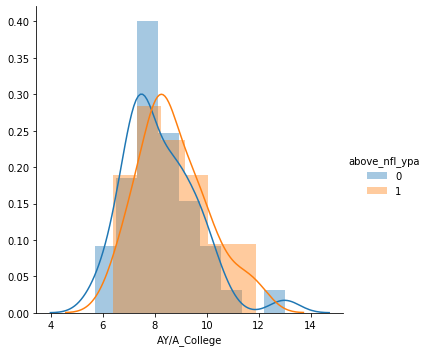

In [42]:
#dist plots
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'AY/A_College').add_legend()

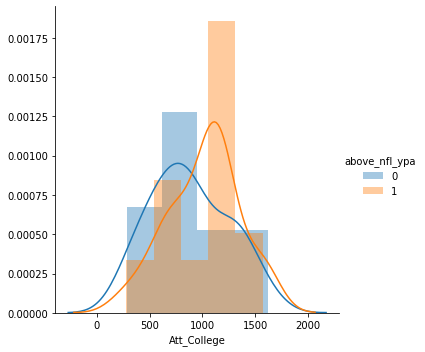

In [43]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Att_College').add_legend()

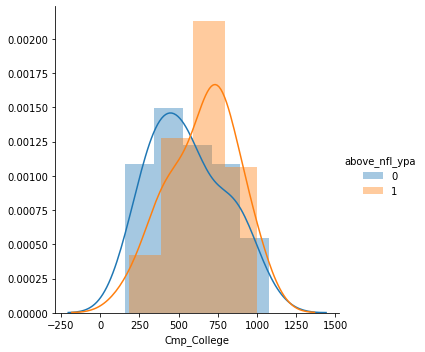

In [44]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Cmp_College').add_legend()

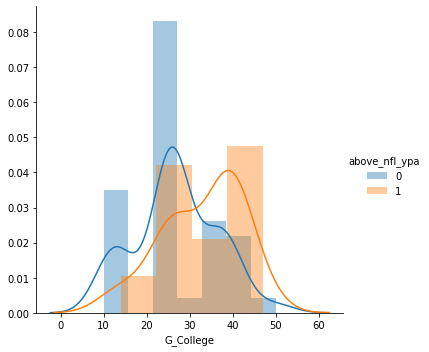

In [45]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'G_College').add_legend()

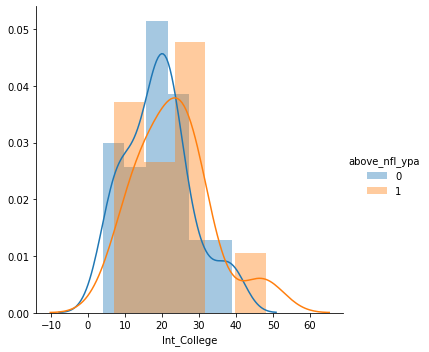

In [46]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Int_College').add_legend()

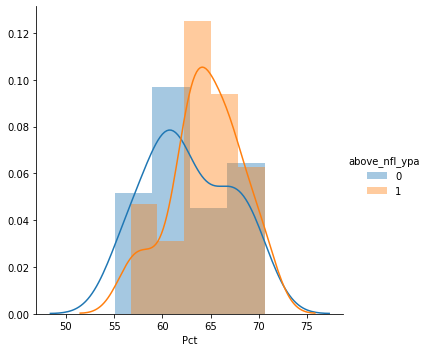

In [47]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Pct').add_legend()

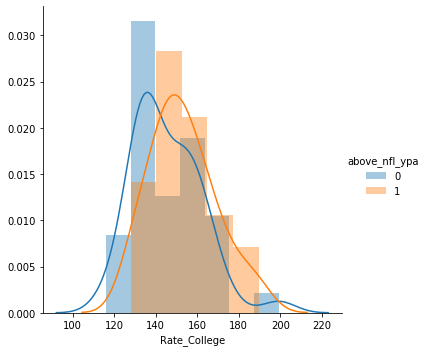

In [48]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Rate_College').add_legend()

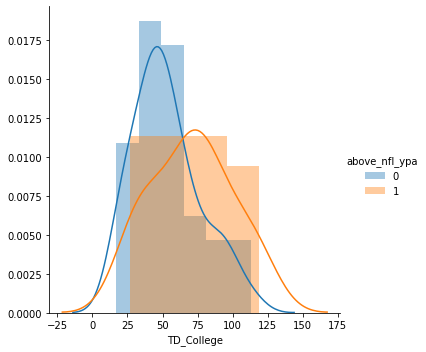

In [49]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'TD_College').add_legend()

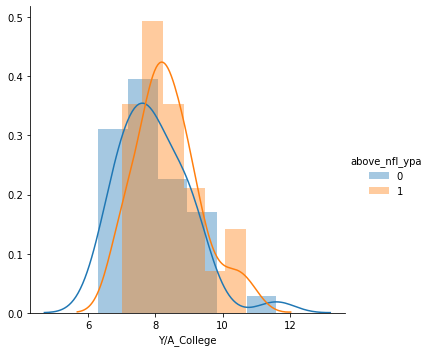

In [50]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Y/A_College').add_legend()

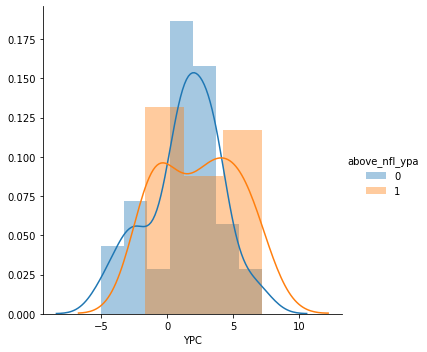

In [51]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'YPC').add_legend()

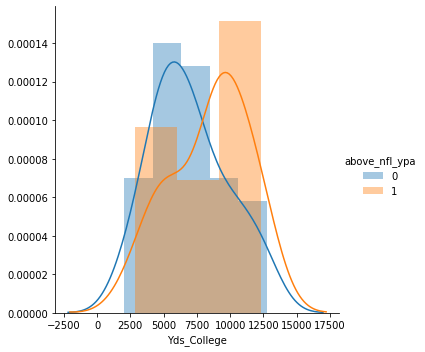

In [52]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Yds_College').add_legend()

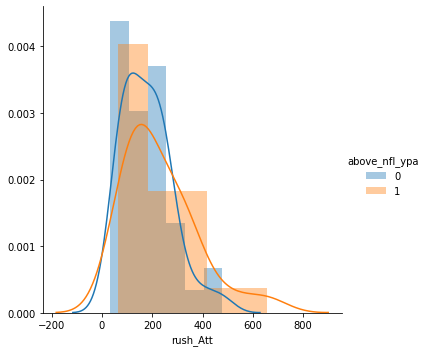

In [53]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'rush_Att').add_legend()

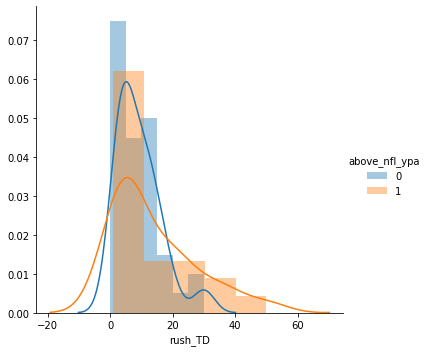

In [54]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'rush_TD').add_legend()

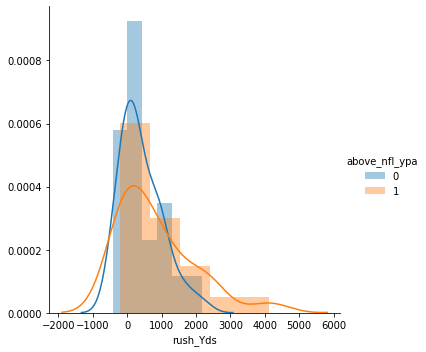

In [55]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'rush_Yds').add_legend()

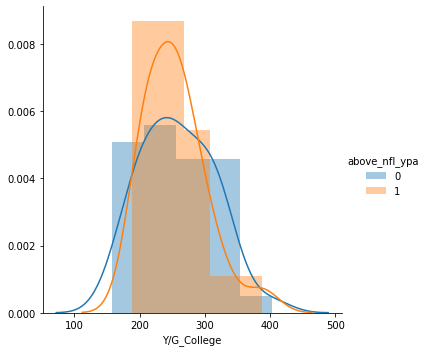

In [56]:
sns.FacetGrid(qbs, hue='above_nfl_ypa', height=5).map(sns.distplot, 'Y/G_College').add_legend()

Text(0.5, 1.0, 'AY/A')

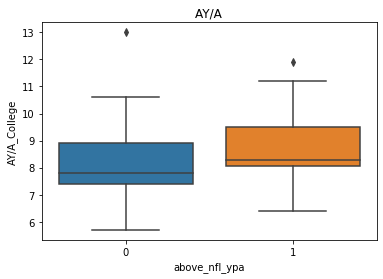

In [57]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'AY/A_College', data=qbs)
plt.title('AY/A')

Text(0.5, 1.0, 'Attempts')

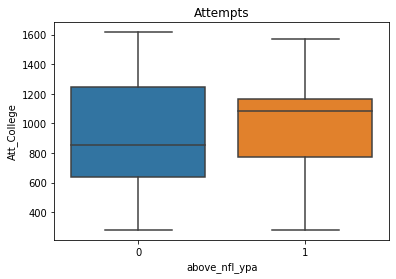

In [58]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Att_College', data=qbs)
plt.title('Attempts')

Text(0.5, 1.0, 'Completions')

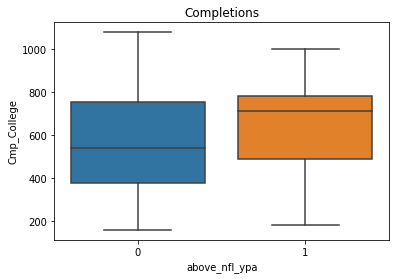

In [59]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Cmp_College', data=qbs)
plt.title('Completions')

Text(0.5, 1.0, 'Games')

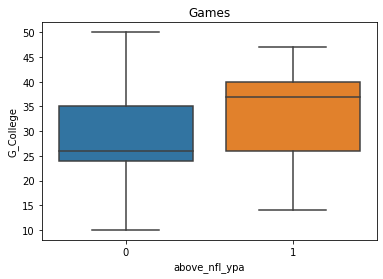

In [60]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'G_College', data=qbs)
plt.title('Games')

Text(0.5, 1.0, 'Interceptions')

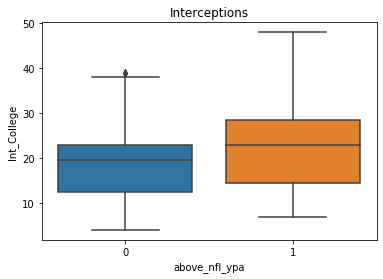

In [61]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Int_College', data=qbs)
plt.title('Interceptions')

Text(0.5, 1.0, 'Completion Percentage')

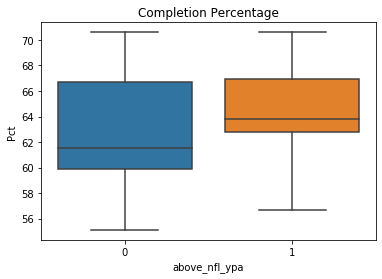

In [62]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Pct', data=qbs)
plt.title('Completion Percentage')

Text(0.5, 1.0, 'Passer Rating')

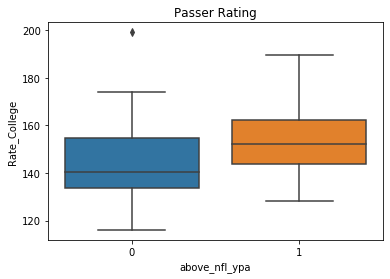

In [63]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Rate_College', data=qbs)
plt.title('Passer Rating')

Text(0.5, 1.0, 'Passing Touchdowns')

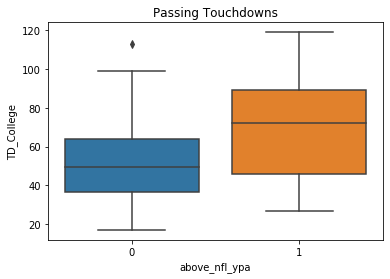

In [64]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'TD_College', data=qbs)
plt.title('Passing Touchdowns')

Text(0.5, 1.0, 'YPA')

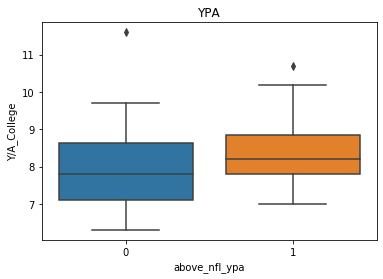

In [65]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Y/A_College', data=qbs)
plt.title('YPA')

Text(0.5, 1.0, 'YPC')

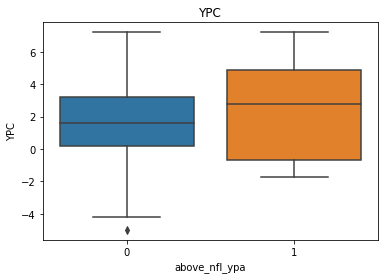

In [66]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'YPC', data=qbs)
plt.title('YPC')

Text(0.5, 1.0, 'Passing Yards')

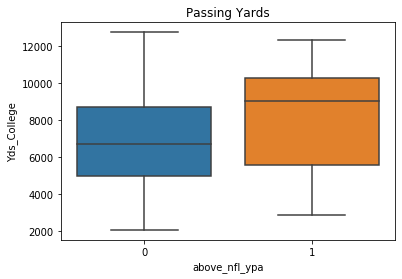

In [67]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Yds_College', data=qbs)
plt.title('Passing Yards')

Text(0.5, 1.0, 'Rushing Attempts')

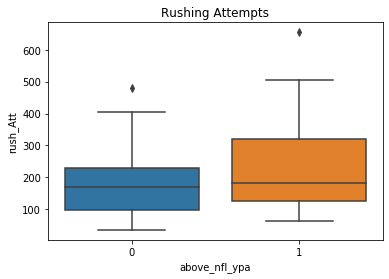

In [68]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'rush_Att', data=qbs)
plt.title('Rushing Attempts')

Text(0.5, 1.0, 'Rushing Touchdowns')

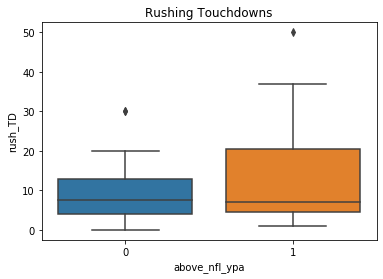

In [69]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'rush_TD', data=qbs)
plt.title('Rushing Touchdowns')

Text(0.5, 1.0, 'Rushing Yards')

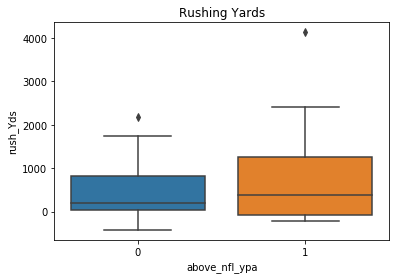

In [70]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'rush_Yds', data=qbs)
plt.title('Rushing Yards')

Text(0.5, 1.0, 'Passing Yards Per Game')

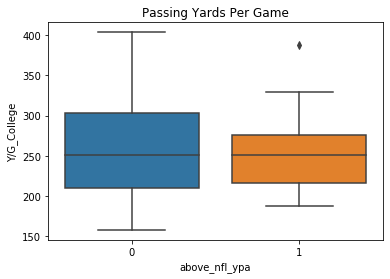

In [71]:
#box plots
sns.boxplot(x='above_nfl_ypa', y = 'Y/G_College', data=qbs)
plt.title('Passing Yards Per Game')

In [72]:
qbs[(qbs['Rate_College'] > 180) & (qbs['above_nfl_ypa'] == 0)]

,Y/A_NFL,AY/A_College,Att_College,Cmp_College,G_College,Int_College,Pct,Rate_College,TD_College,Y/A_College,YPC,Yds_College,rush_Att,rush_TD,rush_Yds,Y/G_College,above_nfl_ypa
Player,,,,,,,,,,,,,,,,,
Kyler Murray,6.9,13.0,377,260,14,7,69.0,199.2,42,11.6,7.2,4361,140,12,1001,311.5,0


### Observations
If you notice in the AY/A and Passer Rating box plots, the highest QB in those two statistics was beloe the NFL Avg YPA. When examining this closer this is Kyler Murray. Whose NFL YPA after one season is 6.9. This is close to the NFL 10 year average. In the offense he plays in, he throws a lot of short passes. This could be a reason why he has a lower than average YPA. 

There are other outliers present and we will keep these in there for now. The explanation for these outliers will be investigated. For instance, Kyler Murray's aDOT(Average Depth Of Targe) could be why he has a lower YPA. Other explanations for "unsuccessful" quarterbacks could be going to badly run organization with a history of losing.


When looking at the box plots of each feature, there are many that have a higher mean for QBs above the NFL YPA Average. This is apparent in AY/A, Attempts, Completions, Games, Completion Percentage, Passer Rating, Passing Touchdowns, YPA and Passing Yards. The same can not be said for rushing statistics. These may need to be dropped. 

# Bootstrap Inference

We will now use Bootstrap Inference to explore how the features relate amongst the subgroups of Above NFL YPA and Below NFL YPA.

## AY/A

Calculate 95% confidence interval for the difference between the standard deviation of Above NFL YPA and Below NFL YPA for AY/A_College. 10000 Replicates. Plot histogram and mark interval. State Null and Alternative Hypothesis and whether you reject the Null.

In [73]:
above_aya = qbs[qbs['above_nfl_ypa'] == 1]['AY/A_College']
below_aya = qbs[qbs['above_nfl_ypa'] == 0]['AY/A_College']

std_above_aya = np.std(above_aya)
std_below_aya = np.std(below_aya)
diff_of_std_aya = std_below_aya - std_above_aya

print('The Difference in stds: ' + str(diff_of_std_aya))

The Difference in stds: 0.06566302928242762


In [74]:
concat_data_aya = np.concatenate((above_aya, below_aya))
concat_std_aya = np.std(concat_data_aya)
above_shift_aya = above_aya - np.std(above_aya) + concat_std_aya
below_shift_aya = below_aya - np.std(below_aya) + concat_std_aya

np.random.seed(47)
bs_replicates_std_aya = np.empty(10000)
for i in range(10000):
    bs_sample_above_aya = np.random.choice(above_shift_aya, len(above_aya))
    bs_sample_below_aya = np.random.choice(below_shift_aya, len(below_aya))
    bs_replicates_std_aya[i] = np.std(bs_sample_below_aya) - np.std(bs_sample_above_aya)
    
conf_int_std_aya = np.percentile(bs_replicates_std_aya, [2.5, 97.5])
print(conf_int_std_aya)

[-0.45266768  0.66135924]


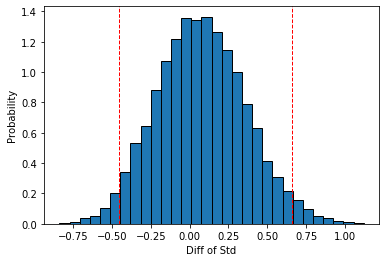

In [75]:
plt.hist(bs_replicates_std_aya, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_aya, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_aya, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The 95% confidence interval is -0.462 to 0.649. Since the observed difference is 0.066 and in the interval, the null hypothesis is rejected.

Do the same for the mean.

In [76]:
mean_above_aya = np.mean(above_aya)
mean_below_aya = np.mean(below_aya)
diff_of_mean_aya = mean_above_aya - mean_below_aya
print('The Difference of the mean: ' + str(diff_of_mean_aya))

The Difference of the mean: 0.5011956521739123


In [77]:
concat_mean_aya = np.mean(concat_data_aya)
above_shift_mean_aya = above_aya- np.mean(above_aya) + concat_mean_aya
below_shift_mean_aya = below_aya - np.mean(below_aya) + concat_mean_aya

np.random.seed(47)
bs_replicates_mean_aya = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_aya = np.random.choice(above_shift_mean_aya, len(above_aya))
    bs_sample_below_mean_aya = np.random.choice(below_shift_mean_aya, len(below_aya))
    bs_replicates_mean_aya[i] = np.mean(bs_sample_above_mean_aya) - np.mean(bs_sample_below_mean_aya)

In [79]:
p_aya = np.sum(bs_replicates_mean_aya >= diff_of_mean_aya) / len(bs_replicates_mean_aya)
print('p-value: ' + str(p_aya))

p-value: 0.0846


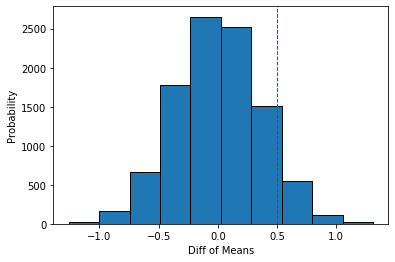

In [80]:
plt.hist(bs_replicates_mean_aya, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_aya, color = 'r', linestyle='dashed', linewidth = 1)

## Attempts

Calculate 95% confidence interval for the difference between the standard deviation of Above NFL YPA and Below NFL YPA for Att_College. 10000 Replicates. Plot histogram and mark interval. State Null and Alternative Hypothesis and whether you reject the Null.

In [81]:
above_att = qbs[qbs['above_nfl_ypa'] == 1]['Att_College']
below_att = qbs[qbs['above_nfl_ypa'] == 0]['Att_College']

std_above_att = np.std(above_att)
std_below_att = np.std(below_att)
diff_of_std_att = std_below_att - std_above_att

print('The Difference in stds: ' + str(diff_of_std_att))

The Difference in stds: 31.238140219181275


In [82]:
concat_data_att = np.concatenate((above_att, below_att))
concat_std_att = np.std(concat_data_att)
above_shift_att = above_att - np.std(above_att) + concat_std_att
below_shift_att = below_att - np.std(below_att) + concat_std_att

np.random.seed(47)
bs_replicates_std_att = np.empty(10000)
for i in range(10000):
    bs_sample_above_att = np.random.choice(above_shift_att, len(above_att))
    bs_sample_below_att = np.random.choice(below_shift_att, len(below_att))
    bs_replicates_std_att[i] = np.std(bs_sample_below_att) - np.std(bs_sample_above_att)
    
conf_int_std_att = np.percentile(bs_replicates_std_att, [2.5, 97.5])
print(conf_int_std_att)

[-68.8854016  144.03106387]


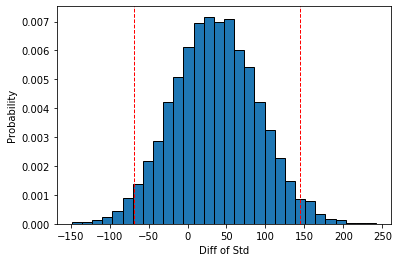

In [83]:
plt.hist(bs_replicates_std_att, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_att, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_att, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

Do the same for the mean.

In [84]:
mean_above_att = np.mean(above_att)
mean_below_att = np.mean(below_att)
diff_of_mean_att = mean_above_att - mean_below_att
print('The Difference of the mean: ' + str(diff_of_mean_att))

The Difference of the mean: 134.0695652173913


In [85]:
concat_mean_att = np.mean(concat_data_att)
above_shift_mean_att = above_att - np.mean(above_att) + concat_mean_att
below_shift_mean_att = below_att - np.mean(below_att) + concat_mean_att

np.random.seed(47)
bs_replicates_mean_att = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_att = np.random.choice(above_shift_mean_att, len(above_att))
    bs_sample_below_mean_att = np.random.choice(below_shift_mean_att, len(below_att))
    bs_replicates_mean_att[i] = np.mean(bs_sample_above_mean_att) - np.mean(bs_sample_below_mean_att)

In [86]:
p_att = np.sum(bs_replicates_mean_att >= diff_of_mean_att) / len(bs_replicates_mean_att)
print('p-value: ' + str(p_att))

p-value: 0.0669


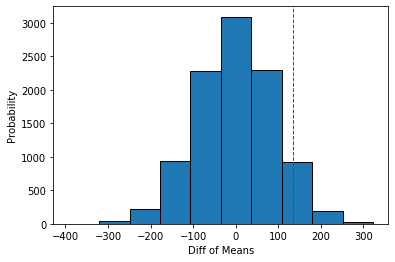

In [87]:
plt.hist(bs_replicates_mean_att, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_att, color = 'r', linestyle='dashed', linewidth = 1)

## Completions

In [88]:
above_cmp = qbs[qbs['above_nfl_ypa'] == 1]['Cmp_College']
below_cmp = qbs[qbs['above_nfl_ypa'] == 0]['Cmp_College']

std_above_cmp = np.std(above_cmp)
std_below_cmp = np.std(below_cmp)
diff_of_std_cmp = std_below_cmp - std_above_cmp

print('The Difference in stds: ' + str(diff_of_std_cmp))

The Difference in stds: 25.7152851655118


In [89]:
concat_data_cmp = np.concatenate((above_cmp, below_cmp))
concat_std_cmp = np.std(concat_data_cmp)
above_shift_cmp = above_cmp - np.std(above_cmp) + concat_std_cmp
below_shift_cmp = below_cmp - np.std(below_cmp) + concat_std_cmp

np.random.seed(47)
bs_replicates_std_cmp = np.empty(10000)
for i in range(10000):
    bs_sample_above_cmp = np.random.choice(above_shift_cmp, len(above_cmp))
    bs_sample_below_cmp = np.random.choice(below_shift_cmp, len(below_cmp))
    bs_replicates_std_cmp[i] = np.std(bs_sample_below_cmp) - np.std(bs_sample_above_cmp)
    
conf_int_std_cmp = np.percentile(bs_replicates_std_cmp, [2.5, 97.5])
print(conf_int_std_cmp)

[-37.655107    94.06728504]


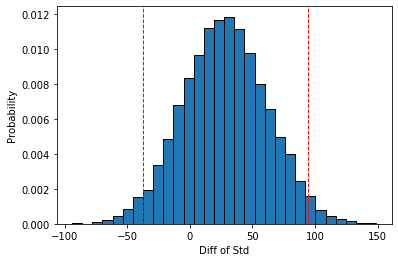

In [90]:
plt.hist(bs_replicates_std_cmp, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_cmp, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_cmp, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

Mean

In [91]:
mean_above_cmp = np.mean(above_cmp)
mean_below_cmp = np.mean(below_cmp)
diff_of_mean_cmp = mean_above_cmp - mean_below_cmp
print('The Difference of the mean: ' + str(diff_of_mean_cmp))

The Difference of the mean: 99.7217391304348


In [92]:
concat_mean_cmp = np.mean(concat_data_cmp)
above_shift_mean_cmp = above_cmp - np.mean(above_cmp) + concat_mean_cmp
below_shift_mean_cmp = below_cmp - np.mean(below_cmp) + concat_mean_cmp

np.random.seed(47)
bs_replicates_mean_cmp = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_cmp = np.random.choice(above_shift_mean_cmp, len(above_cmp))
    bs_sample_below_mean_cmp = np.random.choice(below_shift_mean_cmp, len(below_cmp))
    bs_replicates_mean_cmp[i] = np.mean(bs_sample_above_mean_cmp) - np.mean(bs_sample_below_mean_cmp)

p_cmp = np.sum(bs_replicates_mean_cmp >= diff_of_mean_cmp) / len(bs_replicates_mean_cmp)
print('p-value: ' + str(p_cmp))

p-value: 0.041


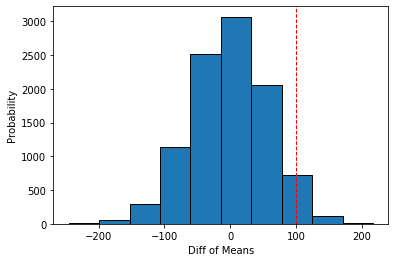

In [93]:
plt.hist(bs_replicates_mean_cmp, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_cmp, color = 'r', linestyle='dashed', linewidth = 1)

## Games

In [94]:
above_g = qbs[qbs['above_nfl_ypa'] == 1]['G_College']
below_g = qbs[qbs['above_nfl_ypa'] == 0]['G_College']

std_above_g = np.std(above_g)
std_below_g = np.std(below_g)
diff_of_std_g = std_below_g - std_above_g

print('The Difference in stds: ' + str(diff_of_std_g))

The Difference in stds: 0.4625199021132289


In [95]:
concat_data_g = np.concatenate((above_g, below_g))
concat_std_g = np.std(concat_data_g)
above_shift_g = above_g - np.std(above_g) + concat_std_g
below_shift_g = below_g - np.std(below_g) + concat_std_g

np.random.seed(47)
bs_replicates_std_g = np.empty(10000)
for i in range(10000):
    bs_sample_above_g = np.random.choice(above_shift_g, len(above_g))
    bs_sample_below_g = np.random.choice(below_shift_g, len(below_g))
    bs_replicates_std_g[i] = np.std(bs_sample_below_g) - np.std(bs_sample_above_g)
    
conf_int_std_g = np.percentile(bs_replicates_std_g, [2.5, 97.5])
print(conf_int_std_g)

[-2.339126    3.45629661]


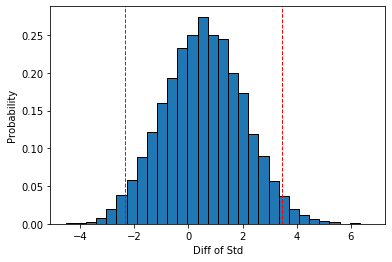

In [96]:
plt.hist(bs_replicates_std_g, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_g, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_g, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

In [97]:
mean_above_g = np.mean(above_g)
mean_below_g = np.mean(below_g)
diff_of_mean_g = mean_above_g - mean_below_g
print('The Difference of the mean: ' + str(diff_of_mean_g))

The Difference of the mean: 6.050000000000001


In [98]:
concat_mean_g = np.mean(concat_data_g)
above_shift_mean_g = above_g - np.mean(above_g) + concat_mean_g
below_shift_mean_g = below_g - np.mean(below_g) + concat_mean_g

np.random.seed(47)
bs_replicates_mean_g = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_g = np.random.choice(above_shift_mean_g, len(above_g))
    bs_sample_below_mean_g = np.random.choice(below_shift_mean_g, len(below_g))
    bs_replicates_mean_g[i] = np.mean(bs_sample_above_mean_g) - np.mean(bs_sample_below_mean_g)

p_g = np.sum(bs_replicates_mean_g >= diff_of_mean_g) / len(bs_replicates_mean_g)
print('p-value: ' + str(p_g))

p-value: 0.0046


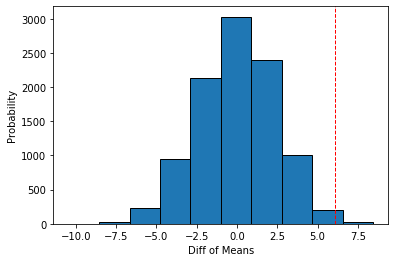

In [99]:
plt.hist(bs_replicates_mean_g, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_g, color = 'r', linestyle='dashed', linewidth = 1)

## Interceptions

The Difference in stds: -1.0422292953226755
[-4.5981195   3.04795101]


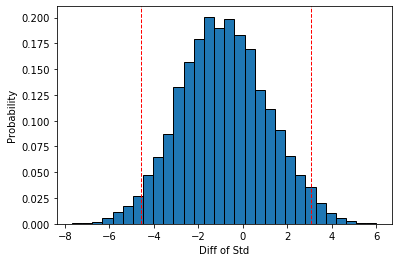

In [100]:
above_int = qbs[qbs['above_nfl_ypa'] == 1]['Int_College']
below_int = qbs[qbs['above_nfl_ypa'] == 0]['Int_College']

std_above_int = np.std(above_int)
std_below_int = np.std(below_int)
diff_of_std_int = std_below_int - std_above_int

print('The Difference in stds: ' + str(diff_of_std_int))

concat_data_int = np.concatenate((above_int, below_int))
concat_std_int = np.std(concat_data_int)
above_shift_int = above_int - np.std(above_int) + concat_std_int
below_shift_int = below_int - np.std(below_int) + concat_std_int

np.random.seed(47)
bs_replicates_std_int = np.empty(10000)
for i in range(10000):
    bs_sample_above_int = np.random.choice(above_shift_int, len(above_int))
    bs_sample_below_int = np.random.choice(below_shift_int, len(below_int))
    bs_replicates_std_int[i] = np.std(bs_sample_below_int) - np.std(bs_sample_above_int)
    
conf_int_std_int = np.percentile(bs_replicates_std_int, [2.5, 97.5])
print(conf_int_std_int)

plt.hist(bs_replicates_std_int, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_int, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_int, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 4.086956521739129
p-value: 0.0558


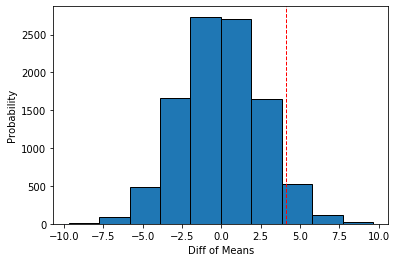

In [101]:
mean_above_int = np.mean(above_int)
mean_below_int = np.mean(below_int)
diff_of_mean_int = mean_above_int - mean_below_int
print('The Difference of the mean: ' + str(diff_of_mean_int))

concat_mean_int = np.mean(concat_data_int)
above_shift_mean_int = above_int - np.mean(above_int) + concat_mean_int
below_shift_mean_int = below_int - np.mean(below_int) + concat_mean_int

np.random.seed(47)
bs_replicates_mean_int = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_int = np.random.choice(above_shift_mean_int, len(above_int))
    bs_sample_below_mean_int = np.random.choice(below_shift_mean_int, len(below_int))
    bs_replicates_mean_int[i] = np.mean(bs_sample_above_mean_int) - np.mean(bs_sample_below_mean_int)

p_int = np.sum(bs_replicates_mean_int >= diff_of_mean_int) / len(bs_replicates_mean_int)
print('p-value: ' + str(p_int))

plt.hist(bs_replicates_mean_int, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_int, color = 'r', linestyle='dashed', linewidth = 1)

# Pct

The Difference in stds: 0.7415905035542791
[-0.3869349   1.98474251]


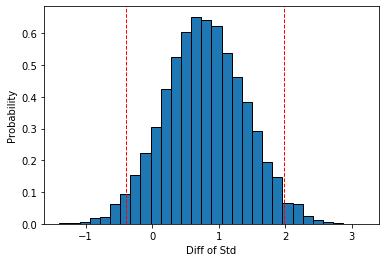

In [102]:
above_pct = qbs[qbs['above_nfl_ypa'] == 1]['Pct']
below_pct = qbs[qbs['above_nfl_ypa'] == 0]['Pct']

std_above_pct = np.std(above_pct)
std_below_pct = np.std(below_pct)
diff_of_std_pct = std_below_pct - std_above_pct

print('The Difference in stds: ' + str(diff_of_std_pct))

concat_data_pct = np.concatenate((above_pct, below_pct))
concat_std_pct = np.std(concat_data_pct)
above_shift_pct = above_pct - np.std(above_pct) + concat_std_pct
below_shift_pct = below_pct - np.std(below_pct) + concat_std_pct

np.random.seed(47)
bs_replicates_std_pct = np.empty(10000)
for i in range(10000):
    bs_sample_above_pct = np.random.choice(above_shift_pct, len(above_pct))
    bs_sample_below_pct = np.random.choice(below_shift_pct, len(below_pct))
    bs_replicates_std_pct[i] = np.std(bs_sample_below_pct) - np.std(bs_sample_above_pct)
    
conf_int_std_pct = np.percentile(bs_replicates_std_pct, [2.5, 97.5])
print(conf_int_std_pct)

plt.hist(bs_replicates_std_pct, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_pct, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_pct, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 1.836847826086931
p-value: 0.0364


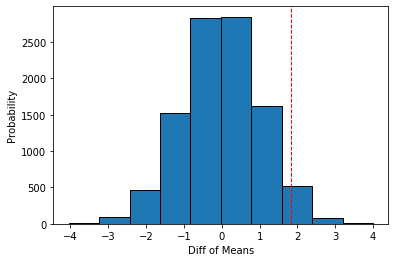

In [103]:
mean_above_pct = np.mean(above_pct)
mean_below_pct = np.mean(below_pct)
diff_of_mean_pct = mean_above_pct - mean_below_pct
print('The Difference of the mean: ' + str(diff_of_mean_pct))

concat_mean_pct = np.mean(concat_data_pct)
above_shift_mean_pct = above_pct - np.mean(above_pct) + concat_mean_pct
below_shift_mean_pct = below_pct - np.mean(below_pct) + concat_mean_pct

np.random.seed(47)
bs_replicates_mean_pct = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_pct = np.random.choice(above_shift_mean_pct, len(above_pct))
    bs_sample_below_mean_pct = np.random.choice(below_shift_mean_pct, len(below_pct))
    bs_replicates_mean_pct[i] = np.mean(bs_sample_above_mean_pct) - np.mean(bs_sample_below_mean_pct)

p_pct = np.sum(bs_replicates_mean_pct >= diff_of_mean_pct) / len(bs_replicates_mean_pct)
print('p-value: ' + str(p_pct))

plt.hist(bs_replicates_mean_pct, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_pct, color = 'r', linestyle='dashed', linewidth = 1)

## Passer Rating

The Difference in stds: 0.4492319907481441
[-5.3170328   6.96451435]


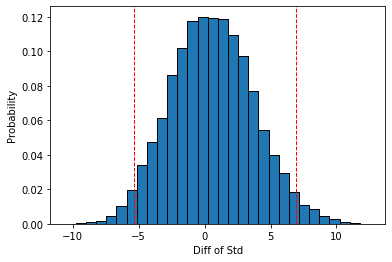

In [104]:
above_rate = qbs[qbs['above_nfl_ypa'] == 1]['Rate_College']
below_rate = qbs[qbs['above_nfl_ypa'] == 0]['Rate_College']

std_above_rate = np.std(above_rate)
std_below_rate = np.std(below_rate)
diff_of_std_rate = std_below_rate - std_above_rate

print('The Difference in stds: ' + str(diff_of_std_rate))

concat_data_rate = np.concatenate((above_rate, below_rate))
concat_std_rate = np.std(concat_data_rate)
above_shift_rate = above_rate - np.std(above_rate) + concat_std_rate
below_shift_rate = below_rate - np.std(below_rate) + concat_std_rate

np.random.seed(47)
bs_replicates_std_rate = np.empty(10000)
for i in range(10000):
    bs_sample_above_rate = np.random.choice(above_shift_rate, len(above_rate))
    bs_sample_below_rate = np.random.choice(below_shift_rate, len(below_rate))
    bs_replicates_std_rate[i] = np.std(bs_sample_below_rate) - np.std(bs_sample_above_rate)
    
conf_int_std_rate = np.percentile(bs_replicates_std_rate, [2.5, 97.5])
print(conf_int_std_rate)

plt.hist(bs_replicates_std_rate, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_rate, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_rate, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 7.769782608695635
p-value: 0.0335


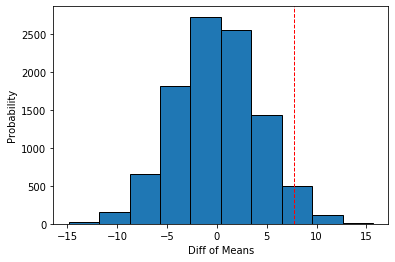

In [105]:
mean_above_rate = np.mean(above_rate)
mean_below_rate = np.mean(below_rate)
diff_of_mean_rate = mean_above_rate - mean_below_rate
print('The Difference of the mean: ' + str(diff_of_mean_rate))

concat_mean_rate = np.mean(concat_data_rate)
above_shift_mean_rate = above_rate - np.mean(above_rate) + concat_mean_rate
below_shift_mean_rate = below_rate - np.mean(below_rate) + concat_mean_rate

np.random.seed(47)
bs_replicates_mean_rate = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_rate = np.random.choice(above_shift_mean_rate, len(above_rate))
    bs_sample_below_mean_rate = np.random.choice(below_shift_mean_rate, len(below_rate))
    bs_replicates_mean_rate[i] = np.mean(bs_sample_above_mean_rate) - np.mean(bs_sample_below_mean_rate)

p_rate = np.sum(bs_replicates_mean_rate >= diff_of_mean_rate) / len(bs_replicates_mean_rate)
print('p-value: ' + str(p_rate))

plt.hist(bs_replicates_mean_rate, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_rate, color = 'r', linestyle='dashed', linewidth = 1)

## Passing Touchdowns

The Difference in stds: -4.463407850438774
[-11.82799128   3.78014195]


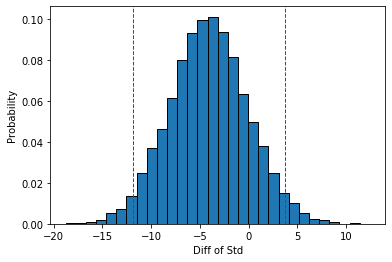

In [106]:
above_td = qbs[qbs['above_nfl_ypa'] == 1]['TD_College']
below_td = qbs[qbs['above_nfl_ypa'] == 0]['TD_College']

std_above_td = np.std(above_td)
std_below_td = np.std(below_td)
diff_of_std_td = std_below_td - std_above_td

print('The Difference in stds: ' + str(diff_of_std_td))

concat_data_td = np.concatenate((above_td, below_td))
concat_std_td = np.std(concat_data_td)
above_shift_td = above_td - np.std(above_td) + concat_std_td
below_shift_td = below_td - np.std(below_td) + concat_std_td

np.random.seed(47)
bs_replicates_std_td = np.empty(10000)
for i in range(10000):
    bs_sample_above_td = np.random.choice(above_shift_td, len(above_td))
    bs_sample_below_td = np.random.choice(below_shift_td, len(below_td))
    bs_replicates_std_td[i] = np.std(bs_sample_below_td) - np.std(bs_sample_above_td)
    
conf_int_std_td = np.percentile(bs_replicates_std_td, [2.5, 97.5])
print(conf_int_std_td)

plt.hist(bs_replicates_std_td, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_td, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_td, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 18.131521739130434
p-value: 0.0044


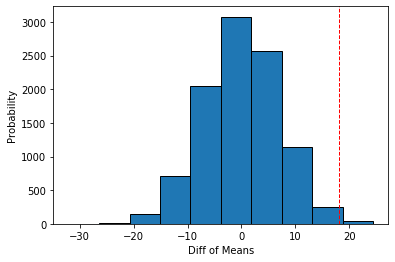

In [107]:
mean_above_td = np.mean(above_td)
mean_below_td = np.mean(below_td)
diff_of_mean_td = mean_above_td - mean_below_td
print('The Difference of the mean: ' + str(diff_of_mean_td))

concat_mean_td = np.mean(concat_data_td)
above_shift_mean_td = above_td - np.mean(above_td) + concat_mean_td
below_shift_mean_td = below_td - np.mean(below_td) + concat_mean_td

np.random.seed(47)
bs_replicates_mean_td = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_td= np.random.choice(above_shift_mean_td, len(above_td))
    bs_sample_below_mean_td = np.random.choice(below_shift_mean_td, len(below_td))
    bs_replicates_mean_td[i] = np.mean(bs_sample_above_mean_td) - np.mean(bs_sample_below_mean_td)

p_td = np.sum(bs_replicates_mean_td >= diff_of_mean_td) / len(bs_replicates_mean_td)
print('p-value: ' + str(p_td))

plt.hist(bs_replicates_mean_td, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_td, color = 'r', linestyle='dashed', linewidth = 1)

## YPA

The Difference in stds: 0.10905643214597438
[-0.28048478  0.55384913]


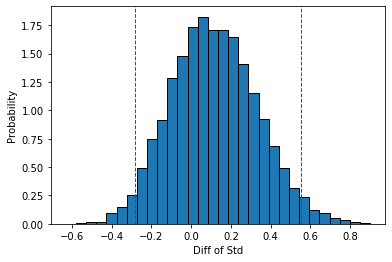

In [108]:
above_ypa = qbs[qbs['above_nfl_ypa'] == 1]['Y/A_College']
below_ypa = qbs[qbs['above_nfl_ypa'] == 0]['Y/A_College']

std_above_ypa = np.std(above_ypa)
std_below_ypa = np.std(below_ypa)
diff_of_std_ypa = std_below_ypa - std_above_ypa

print('The Difference in stds: ' + str(diff_of_std_ypa))

concat_data_ypa = np.concatenate((above_ypa, below_ypa))
concat_std_ypa = np.std(concat_data_ypa)
above_shift_ypa = above_ypa - np.std(above_ypa) + concat_std_ypa
below_shift_ypa = below_ypa - np.std(below_ypa) + concat_std_ypa

np.random.seed(47)
bs_replicates_std_ypa = np.empty(10000)
for i in range(10000):
    bs_sample_above_ypa = np.random.choice(above_shift_ypa, len(above_ypa))
    bs_sample_below_ypa = np.random.choice(below_shift_ypa, len(below_ypa))
    bs_replicates_std_ypa[i] = np.std(bs_sample_below_ypa) - np.std(bs_sample_above_ypa)
    
conf_int_std_ypa = np.percentile(bs_replicates_std_ypa, [2.5, 97.5])
print(conf_int_std_ypa)

plt.hist(bs_replicates_std_ypa, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_ypa, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_ypa, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 0.41206521739130597
p-value: 0.0569


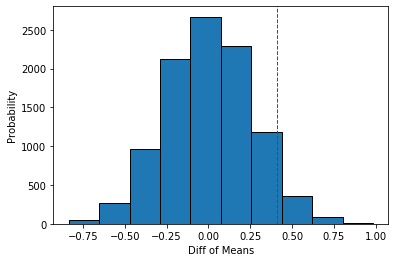

In [109]:
mean_above_ypa = np.mean(above_ypa)
mean_below_ypa = np.mean(below_ypa)
diff_of_mean_ypa = mean_above_ypa - mean_below_ypa
print('The Difference of the mean: ' + str(diff_of_mean_ypa))

concat_mean_ypa = np.mean(concat_data_ypa)
above_shift_mean_ypa = above_ypa - np.mean(above_ypa) + concat_mean_ypa
below_shift_mean_ypa = below_ypa - np.mean(below_ypa) + concat_mean_ypa

np.random.seed(47)
bs_replicates_mean_ypa = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_ypa = np.random.choice(above_shift_mean_ypa, len(above_ypa))
    bs_sample_below_mean_ypa = np.random.choice(below_shift_mean_ypa, len(below_ypa))
    bs_replicates_mean_ypa[i] = np.mean(bs_sample_above_mean_ypa) - np.mean(bs_sample_below_mean_ypa)

p_ypa = np.sum(bs_replicates_mean_ypa >= diff_of_mean_ypa) / len(bs_replicates_mean_ypa)
print('p-value: ' + str(p_ypa))

plt.hist(bs_replicates_mean_ypa, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_ypa, color = 'r', linestyle='dashed', linewidth = 1)

## Passing Yards

The Difference in stds: 12.161463089834797
[-751.2322136   886.04917416]


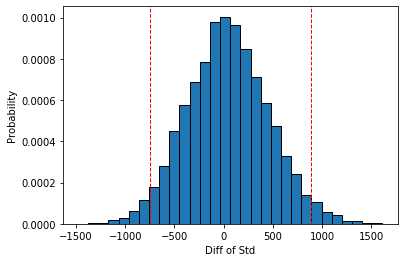

In [110]:
above_yds = qbs[qbs['above_nfl_ypa'] == 1]['Yds_College']
below_yds = qbs[qbs['above_nfl_ypa'] == 0]['Yds_College']

std_above_yds = np.std(above_yds)
std_below_yds = np.std(below_yds)
diff_of_std_yds = std_below_yds - std_above_yds

print('The Difference in stds: ' + str(diff_of_std_yds))

concat_data_yds = np.concatenate((above_yds, below_yds))
concat_std_yds = np.std(concat_data_yds)
above_shift_yds = above_yds - np.std(above_yds) + concat_std_yds
below_shift_yds = below_yds - np.std(below_yds) + concat_std_yds

np.random.seed(47)
bs_replicates_std_yds = np.empty(10000)
for i in range(10000):
    bs_sample_above_yds = np.random.choice(above_shift_yds, len(above_yds))
    bs_sample_below_yds = np.random.choice(below_shift_yds, len(below_yds))
    bs_replicates_std_yds[i] = np.std(bs_sample_below_yds) - np.std(bs_sample_above_yds)
    
conf_int_std_yds = np.percentile(bs_replicates_std_yds, [2.5, 97.5])
print(conf_int_std_yds)

plt.hist(bs_replicates_std_yds, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_yds, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_yds, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 1522.971739130434
p-value: 0.0181


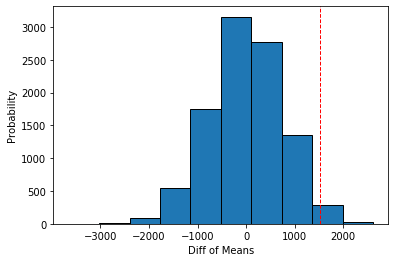

In [111]:
mean_above_yds = np.mean(above_yds)
mean_below_yds = np.mean(below_yds)
diff_of_mean_yds = mean_above_yds - mean_below_yds
print('The Difference of the mean: ' + str(diff_of_mean_yds))

concat_mean_yds = np.mean(concat_data_yds)
above_shift_mean_yds = above_yds - np.mean(above_yds) + concat_mean_yds
below_shift_mean_yds = below_yds - np.mean(below_yds) + concat_mean_yds

np.random.seed(47)
bs_replicates_mean_yds = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_yds = np.random.choice(above_shift_mean_yds, len(above_yds))
    bs_sample_below_mean_yds = np.random.choice(below_shift_mean_yds, len(below_yds))
    bs_replicates_mean_yds[i] = np.mean(bs_sample_above_mean_yds) - np.mean(bs_sample_below_mean_yds)

p_yds = np.sum(bs_replicates_mean_yds >= diff_of_mean_yds) / len(bs_replicates_mean_yds)
print('p-value: ' + str(p_yds))

plt.hist(bs_replicates_mean_yds, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_yds, color = 'r', linestyle='dashed', linewidth = 1)

## YPG

The Difference in stds: 9.703881891822391
[-9.05538598 29.98647279]


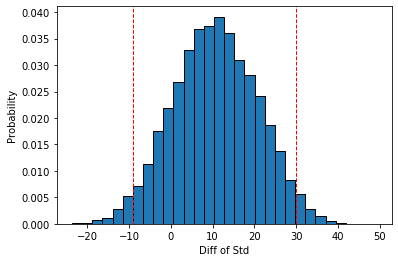

In [112]:
above_ypg = qbs[qbs['above_nfl_ypa'] == 1]['Y/G_College']
below_ypg = qbs[qbs['above_nfl_ypa'] == 0]['Y/G_College']

std_above_ypg = np.std(above_ypg)
std_below_ypg = np.std(below_ypg)
diff_of_std_ypg = std_below_ypg - std_above_ypg

print('The Difference in stds: ' + str(diff_of_std_ypg))

concat_data_ypg = np.concatenate((above_ypg, below_ypg))
concat_std_ypg = np.std(concat_data_ypg)
above_shift_ypg = above_ypg - np.std(above_ypg) + concat_std_ypg
below_shift_ypg = below_ypg - np.std(below_ypg) + concat_std_ypg

np.random.seed(47)
bs_replicates_std_ypg = np.empty(10000)
for i in range(10000):
    bs_sample_above_ypg = np.random.choice(above_shift_ypg, len(above_ypg))
    bs_sample_below_ypg = np.random.choice(below_shift_ypg, len(below_ypg))
    bs_replicates_std_ypg[i] = np.std(bs_sample_below_ypg) - np.std(bs_sample_above_ypg)
    
conf_int_std_ypg = np.percentile(bs_replicates_std_ypg, [2.5, 97.5])
print(conf_int_std_ypg)

plt.hist(bs_replicates_std_ypg, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_ypg, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_ypg, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: -4.255511795539405
p-value: 0.6222


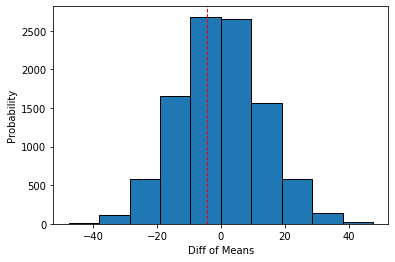

In [113]:
mean_above_ypg = np.mean(above_ypg)
mean_below_ypg = np.mean(below_ypg)
diff_of_mean_ypg = mean_above_ypg - mean_below_ypg
print('The Difference of the mean: ' + str(diff_of_mean_ypg))

concat_mean_ypg = np.mean(concat_data_ypg)
above_shift_mean_ypg = above_ypg - np.mean(above_ypg) + concat_mean_ypg
below_shift_mean_ypg = below_ypg - np.mean(below_ypg) + concat_mean_ypg

np.random.seed(47)
bs_replicates_mean_ypg = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_ypg = np.random.choice(above_shift_mean_ypg, len(above_ypg))
    bs_sample_below_mean_ypg = np.random.choice(below_shift_mean_ypg, len(below_ypg))
    bs_replicates_mean_ypg[i] = np.mean(bs_sample_above_mean_ypg) - np.mean(bs_sample_below_mean_ypg)

p_ypg = np.sum(bs_replicates_mean_ypg >= diff_of_mean_ypg) / len(bs_replicates_mean_ypg)
print('p-value: ' + str(p_ypg))

plt.hist(bs_replicates_mean_ypg, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_ypg, color = 'r', linestyle='dashed', linewidth = 1)

## YPC

The Difference in stds: -0.13838431242077043
[-0.85424145  0.63191649]


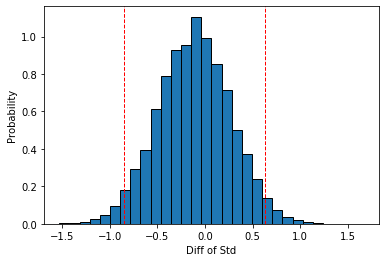

In [114]:
above_ypc = qbs[qbs['above_nfl_ypa'] == 1]['YPC']
below_ypc = qbs[qbs['above_nfl_ypa'] == 0]['YPC']

std_above_ypc = np.std(above_ypc)
std_below_ypc = np.std(below_ypc)
diff_of_std_ypc = std_below_ypc - std_above_ypc

print('The Difference in stds: ' + str(diff_of_std_ypc))

concat_data_ypc = np.concatenate((above_ypc, below_ypc))
concat_std_ypc = np.std(concat_data_ypc)
above_shift_ypc = above_ypc - np.std(above_ypc) + concat_std_ypc
below_shift_ypc = below_ypc - np.std(below_ypc) + concat_std_ypc

np.random.seed(47)
bs_replicates_std_ypc = np.empty(10000)
for i in range(10000):
    bs_sample_above_ypc = np.random.choice(above_shift_ypc, len(above_ypc))
    bs_sample_below_ypc = np.random.choice(below_shift_ypc, len(below_ypc))
    bs_replicates_std_ypc[i] = np.std(bs_sample_below_ypc) - np.std(bs_sample_above_ypc)
    
conf_int_std_ypc = np.percentile(bs_replicates_std_ypc, [2.5, 97.5])
print(conf_int_std_ypc)

plt.hist(bs_replicates_std_ypc, bins=30, density=True, edgecolor='black')
plt.xlabel('Diff of Std')
plt.ylabel('Probability')
plt.axvline(np.percentile(bs_replicates_std_ypc, 2.5), color = 'r', linestyle='dashed', linewidth = 1)
plt.axvline(np.percentile(bs_replicates_std_ypc, 97.5), color = 'r', linestyle='dashed', linewidth = 1)

The Difference of the mean: 1.0867391304347824
p-value: 0.0705


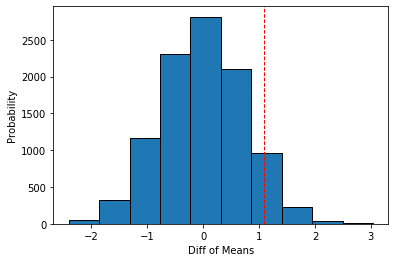

In [115]:
mean_above_ypc = np.mean(above_ypc)
mean_below_ypc = np.mean(below_ypc)
diff_of_mean_ypc = mean_above_ypc - mean_below_ypc
print('The Difference of the mean: ' + str(diff_of_mean_ypc))

concat_mean_ypc = np.mean(concat_data_ypc)
above_shift_mean_ypc = above_ypc - np.mean(above_ypc) + concat_mean_ypc
below_shift_mean_ypc = below_ypc - np.mean(below_ypc) + concat_mean_ypc

np.random.seed(47)
bs_replicates_mean_ypc = np.empty(10000)
for i in range(10000):
    bs_sample_above_mean_ypc = np.random.choice(above_shift_mean_ypc, len(above_ypc))
    bs_sample_below_mean_ypc = np.random.choice(below_shift_mean_ypc, len(below_ypc))
    bs_replicates_mean_ypc[i] = np.mean(bs_sample_above_mean_ypc) - np.mean(bs_sample_below_mean_ypc)

p_ypc = np.sum(bs_replicates_mean_ypc >= diff_of_mean_ypc) / len(bs_replicates_mean_ypc)
print('p-value: ' + str(p_ypc))

plt.hist(bs_replicates_mean_ypc, edgecolor='black')
plt.xlabel('Diff of Means')
plt.ylabel('Probability')
plt.axvline(diff_of_mean_ypc, color = 'r', linestyle='dashed', linewidth = 1)

Summary of p-values for the mean of selected features.

In [116]:
print('The p-value of the difference in mean of AY/A for our subgroups is: ' + str(p_aya))
print('The p-value of the difference in mean of Attempts for our subgroups is: ' + str(p_att))
print('The p-value of the difference in mean of Completions for our subgroups is: ' + str(p_cmp))
print('The p-value of the difference in mean of Games for our subgroups is: ' + str(p_g))
print('The p-value of the difference in mean of Interceptions for our subgroups is: ' + str(p_int))
print('The p-value of the difference in mean of Completion Percentage for our subgroups is: ' + str(p_pct))
print('The p-value of the difference in mean of Passer Rating for our subgroups is: ' + str(p_rate))
print('The p-value of the difference in mean of Passing Touchdowns for our subgroups is: ' + str(p_td))
print('The p-value of the difference in mean of YPA for our subgroups is: ' + str(p_ypa))
print('The p-value of the difference in mean of Passing Yards for our subgroups is: ' + str(p_yds))
print('The p-value of the difference in mean of YPG for our subgroups is: ' + str(p_ypg))
print('The p-value of the difference in mean of YPC for our subgroups is: ' + str(p_ypc))

The p-value of the difference in mean of AY/A for our subgroups is: 0.0846
The p-value of the difference in mean of Attempts for our subgroups is: 0.0669
The p-value of the difference in mean of Completions for our subgroups is: 0.041
The p-value of the difference in mean of Games for our subgroups is: 0.0046
The p-value of the difference in mean of Interceptions for our subgroups is: 0.0558
The p-value of the difference in mean of Completion Percentage for our subgroups is: 0.0364
The p-value of the difference in mean of Passer Rating for our subgroups is: 0.0335
The p-value of the difference in mean of Passing Touchdowns for our subgroups is: 0.0044
The p-value of the difference in mean of YPA for our subgroups is: 0.0569
The p-value of the difference in mean of Passing Yards for our subgroups is: 0.0181
The p-value of the difference in mean of YPG for our subgroups is: 0.6222
The p-value of the difference in mean of YPC for our subgroups is: 0.0705


## Multicollinearity


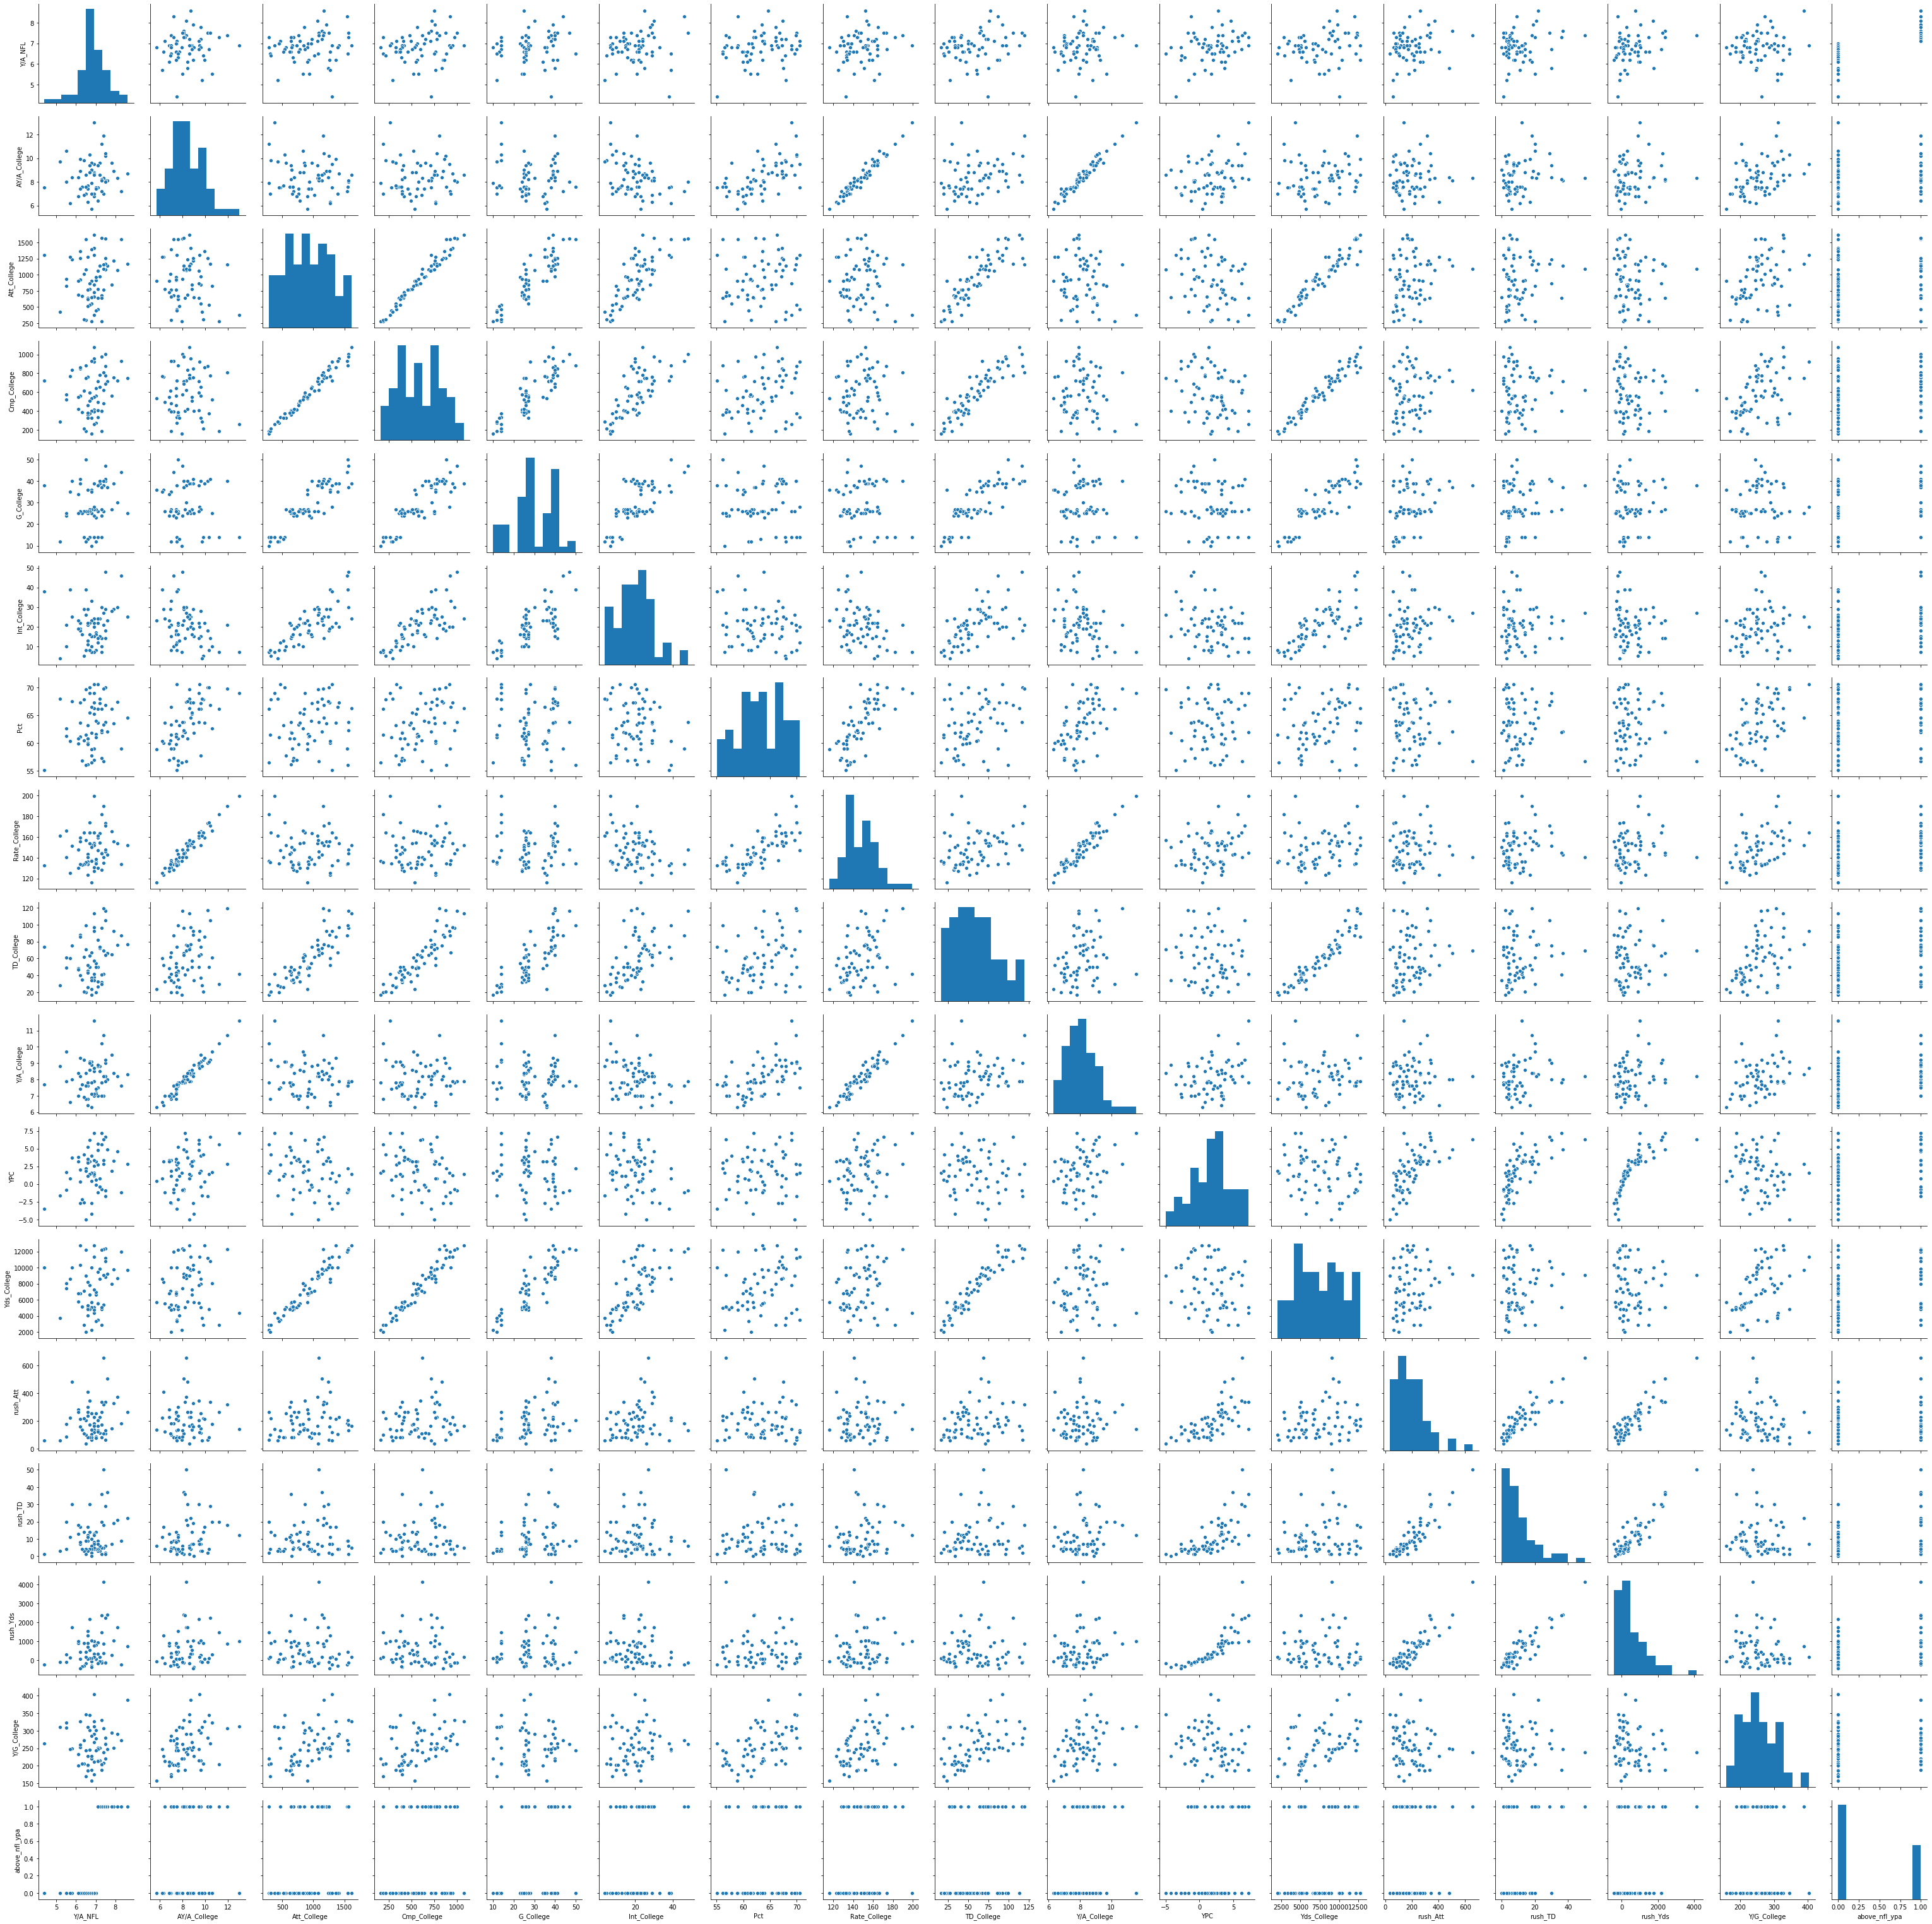

In [117]:
sns.pairplot(qbs)

### Observations

When you examine the pairplot above, you can see that there are some features that correlate strongly to each other. This means there is some multicollinearity amongst our features and some will need to be dropped. 

This will be further explored during feature selection when building our machine learning model.

The columns Y/A_NFL and above_nfl_ypa will both be kept to explore the feasibility of building a continuous target variable model vs a categorical target variable model.

We wil however get rid of the rushing statistics. Using logic, it does not make much sense that college rushing statistics will influence the NFL YPA of a quarterback.

In [118]:
model_df = qbs.drop(['YPC', 'rush_Att', 'rush_Yds', 'rush_TD'], axis=1)

model_df.columns

Index(['Y/A_NFL', 'AY/A_College', 'Att_College', 'Cmp_College', 'G_College',
       'Int_College', 'Pct', 'Rate_College', 'TD_College', 'Y/A_College',
       'Yds_College', 'Y/G_College', 'above_nfl_ypa'],
      dtype='object')

# Conclusions

We explored various NFL Passing Data related to QB Win Pct and determined 8 significant metrics that included:

1. Passer Rating - corr = 0.73
2. AY/A - corr = 0.72
3. ANY/A - corr = 0.72
4. TD% - corr = 0.69
5. QBR - corr = 0.67
6. NY/A - corr = 0.64
7. YPA - corr = 0.64
8. Cmp% - corr = 0.6

Even though YPA had the 7th highest correlation, when correlation matrices were calculated with the College Statistics, YPA had the strongest association with 15 College Statistics. 

The Average NFL YPA was then determined to be 7.1 between 2009 and 2019. The features were then analyzed univariately and bivariately. Bootstrap Inference was used to examine the features by looking at the difference in mean of the subgroups. Multicollinearity was explored using Seaborn's pairplot and it was clear there are strong relationsips amongs several of the features. This will need to be explored further when selecting the features used in our model.

The dataset retained both a continuous and categorical target variable so that both approaches can be looked at. 

In [120]:
model_df.to_csv('model-data.csv')